<h1 align="center" style="color:#6699ff"> DataCamp IEEE Fraud Detection </h1>

<img src="https://github.com/DataCampM2DSSAF/suivi-du-data-camp-equipe-tchouacheu-niang-chokki/blob/master/img/credit-card-fraud-detection.png?raw=true" width="800" align="right">

#  <a style="color:#6699ff"> Team </a>
- <a style="color:#6699ff">Mohamed NIANG </a>
- <a style="color:#6699ff">Fernanda Tchouacheu </a>
- <a style="color:#6699ff">Hypolite Chokki </a>

# <a style="color:#6699ff">  Table of Contents</a> 

<a style="color:#6699ff"> I. Introduction</a>

<a style="color:#6699ff"> II. Descriptive Statistics & Visualization</a>

<a style="color:#6699ff"> III. Preprocessing</a>

<a style="color:#6699ff"> IV. Machine Learning Models</a>

**Import Modules and Datasets**

In [211]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 500)
from importlib import reload
from pprint import pprint

In [212]:
%%time
train_identity = pd.read_csv('train_identity.csv',sep=",")
train_transaction = pd.read_csv('train_transaction.csv',sep=",")
test_identity = pd.read_csv('test_identity.csv',sep=",")
test_transaction = pd.read_csv('test_transaction.csv',sep=",")
# combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
del train_identity, train_transaction, test_identity, test_transaction

Wall time: 2min 11s


In [12]:
sample_submission = pd.read_csv('sample_submission.csv')

In [13]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN   

               ...               V330 V331 V332 V333 V334  V335  V336  V337  \
0              ...                NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   
1              ...                NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   
2              ...                NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   
3              ...                NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   
4              ...                0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   

   V338  V339  id_01    id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0   NaN   NaN    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2   NaN   NaN    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3   NaN   NaN    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4   0.0   0.0    0.0  70787.0    NaN    NaN    NaN    NaN    NaN    NaN   

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0    NaN    NaN    NaN       NaN    NaN    NaN    NaN       NaN    NaN    NaN   
1    NaN    NaN    NaN       NaN    NaN    NaN    NaN       NaN    NaN    NaN   
2    NaN    NaN    NaN       NaN    NaN    NaN    NaN       NaN    NaN    NaN   
3    NaN    NaN    NaN       NaN    NaN    NaN    NaN       NaN    NaN    NaN   
4    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound  166.0    NaN   

   id_19  id_20  id_21  id_22  id_23  id_24  id_25  id_26  id_27  id_28  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4  542.0

In [14]:
print("The shape of test is: %s, %s" % (test.shape[0],test.shape[1]))
test.head()

The shape of test is: 506691, 433


TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0        visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0        visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0        visa  226.0  debit  472.0   87.0  2635.0    NaN   hotmail.com   
3  150.0        visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   
4  150.0  mastercard  117.0  debit  264.0   87.0     6.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   
4           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0  5.0  0.0  6.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   
4   14.0  6.0   22.0   22.0   0.0   22.0   0.0 NaN NaN NaN NaN   22.0   22.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5     ...     V330 V331 V332 V333  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN     ...      NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN     ...      NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F     ...      NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN     ...      NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN   22.0  T  T  T  NaN  NaN     ...      NaN  NaN  NaN  NaN   

   V334  V335  V336  V337  V338  V339  id-01  id-02  id-03  id-04  id-05  \
0   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   

   id-06  id-07  id-08  id-09  id-10  id-11  id-12  id-13  id-14  id-15  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   id-16  id-17  id-18  id-19  id-20  id-21  id-22  id-23  id-24  id-25  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   id-26  id-27  id-28  id-29  id-30  id-31  id-32  id-33  id-34  id-35  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    Na

# <a style="color:#6699ff"> I. Introduction</a>

### Information of Variables

https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

**Continuous Variables**

``TransactionDT``: timedelta from a given reference datetime (not an actual timestamp)

``TransactionAMT``: transaction payment amount in USD

``dist``: May be the distance from addresses

``C1-C14``: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

``D1-D15``: timedelta, such as days between previous transaction, etc.

``V1`` - ``V339``: Vesta engineered rich features, including ranking, counting, and other entity relations.

``id_01`` - ``id_11``(In identity table)

**Categorical Variables**

From **Transaction** Table:

``ProductCD``: product code, the product for each transaction

``card1`` - ``card6``: payment card information, such as card type, card category, issue bank, country, etc.

``addr1``, ``addr2``: 
both are for purchaser,
addr1 as billing region,
addr2 as billing country

``Pemaildomain``, ``Remaildomain``: purchaser and recipient email domain

``M1`` - ``M9``: match, such as names on card and address, etc.

From **Identity** Table:

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.

``id12`` - ``id38``, ``DeviceType``, ``DeviceInfo``

In [15]:
# We would update this list once we create more categorical features in feature engineering
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
            'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 
            'DeviceType', 'DeviceInfo', 'ProductCD','card1', 'card2', 'card3', 'card4', 'card5', 
            'card6', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
            'P_emaildomain', 'R_emaildomain']

In [16]:
obj_cols = train.dtypes[train.dtypes == 'object'].index
#obj_cols

### Detection of Missing Values
- The datasets have a big proportion of missing values, over 47% of features have more than 70% missing value.
- Train and test sets have similar percentage of features with missing values in different percentages...怎么表述？
- There are 2.76 percent of features have more than 90% of missing value and 2.07 percent of features have more than 99% of missing value. So we can consider to remove these features after further discussion.
- There are 1 features, which is V107, in test set with only one unique value. We will take a closer look of V107 in both train and test datasets and decide whether to remove it as only one unique value might represent it doesn't contain any useful information.

In [17]:
def detectmissing(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing(%)'] = df.isnull().sum().values / train.shape[0]*100  
    summary['Uniques'] = df.nunique().values
    
    return summary

In [18]:
train_missing = detectmissing(train)

In [20]:
col_70missing = train_missing[train_missing['Missing(%)'] >70]['Name'].tolist()
print('The features with more than 70% missing value in Train are: ')
col_70missing

['dist2',
 'R_emaildomain',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 '

The features with over 70% missing value in Train are concentrated in D, V, and id columns

In [21]:
test_missing = detectmissing(test)

In [22]:
print('The features with more than 70% missing value in Test are: ')
train_missing[train_missing['Missing(%)'] >70]['Name'].tolist()

The features with more than 70% missing value in Test are: 


['dist2',
 'R_emaildomain',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 '

In [25]:
one_unique_col = [i for i in train.columns if train[i].nunique() == 1]
one_unique_col_test = [i for i in test.columns if test[i].nunique() == 1]
print("There are %d features in train set with only one unique value" % len(one_unique_col))
print("There are %d features in test set with only one unique value" % len(one_unique_col_test))
print("The feature is %s" % one_unique_col_test[0])

There are 0 features in train set with only one unique value
There are 1 features in test set with only one unique value
The feature is V107


Let's drop V107

In [26]:
train.drop(columns='V107',inplace=True)
test.drop(columns='V107',inplace=True)

In [27]:
gc.collect()

317

# <a style="color:#6699ff"> II. Descriptive Statistics & Visualization</a>

### isFraud - Target Distribution

Text(0,0.5,'Percentage')

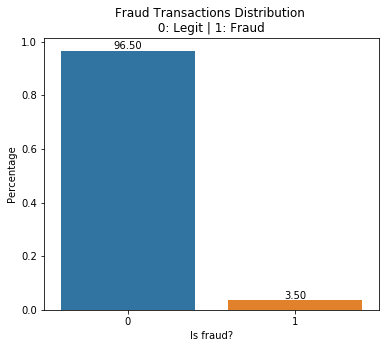

In [213]:
plt.figure(figsize=(6, 5))
yaxis = train['isFraud'].value_counts().values / train.shape[0]
barplot = sns.barplot(x=[0,1], y=yaxis)
for p in barplot.patches:
    barplot.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title("Fraud Transactions Distribution \n 0: Legit | 1: Fraud ")
plt.xlabel('Is fraud?')
plt.ylabel('Percentage')

### TransactionDT - timedelta from a given reference datetime
- We can have a reasonable inference that TransactionDT is in seconds by doing some trails with simple math
- Therefore, we can create new columns such as hour, day, week, month to take a closer look to the time and target 
- As we can see from the distribution of TransactionDT(bin in minute), train and test datasets are in different time periods, thus splitting data by the time order can be a reasonable practice.
- It seems that in the hours from 4am to 12pm the fraction of fraudulent transaction is significantly higher than other hours. And from hour 2pm to 4pm, the fractions of fraud is the lowest. While from 7am to 10am the fraction is the highest. So we can create another new feature, classifying time periods into different levels of warning sign in terms of their fraud fraction.
- We can't model year or month as we only have one year of data so we won't be able to learn any trends. There is a chance for day of the week and hour being useful.

In [29]:
#reference: https://www.kaggle.com/c/ieee-fraud-detection/discussion/100071#latest-577632
train_span = (train['TransactionDT'].max() - train['TransactionDT'].min())/(3600*24)
test_span = (test['TransactionDT'].max() - test['TransactionDT'].min())/(3600*24)
total_span = (test['TransactionDT'].max() - train['TransactionDT'].min())/(3600*24)
gap_span = (test['TransactionDT'].min() - train['TransactionDT'].max())/(3600*24)
print('Time span of Train dataset is {:.2f} days'.format(train_span))
print('Time span of Test dataset is {:.2f} days'.format(test_span))
print('Time span of Total dataset is {:.2f} days'.format(total_span))
print('Time gap between train and test is {:.2f} days'.format(gap_span))

Time span of Train dataset is 182.00 days
Time span of Test dataset is 183.00 days
Time span of Total dataset is 395.00 days
Time gap between train and test is 30.00 days


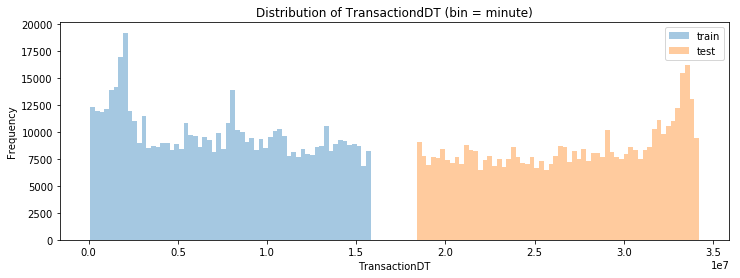

In [30]:
plt.figure(figsize=(12,4))
sns.distplot(train['TransactionDT'],kde=False,bins=60)
sns.distplot(test['TransactionDT'],kde=False,bins=60)
plt.legend(['train', 'test'])
plt.ylabel('Frequency')
plt.title('Distribution of TransactiondDT (bin = minute)');
plt.show()

As we can see from the distribution of TransactionDT(bin in minute) graph above, train and test datasets are in different time periods, thus splitting data by the time order can be a reasonable practice. And it seems that in the first month in train and last month in test, transaction frequency is higher than other months.

In [31]:
train['day'] = ((train['TransactionDT']//(3600*24)-1)%7)+1
test['day'] = ((test['TransactionDT']//(3600*24)-1)%7)+1

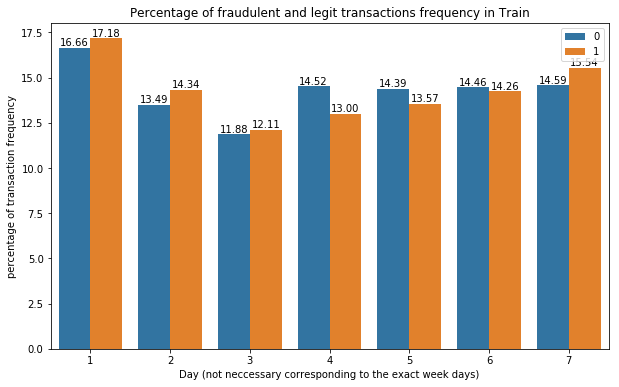

In [32]:
train_day = train.groupby('isFraud')['day'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('day')
plt.figure(figsize=(10,6))
barplot = sns.barplot(x="day", y="percentage", hue="isFraud", data=train_day)
plt.legend()
plt.ylabel('percentage of transaction frequency')
plt.xlabel('Day (not neccessary corresponding to the exact week days)')
plt.title('Percentage of fraudulent and legit transactions frequency in Train')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

Not much finding. On average, day 1 has higher transaction frequency, both in fraud and legit transactions.

In [33]:
train['hour'] = ((train['TransactionDT']//3600)%24)+1
test['hour'] = ((test['TransactionDT']//3600)%24)+1

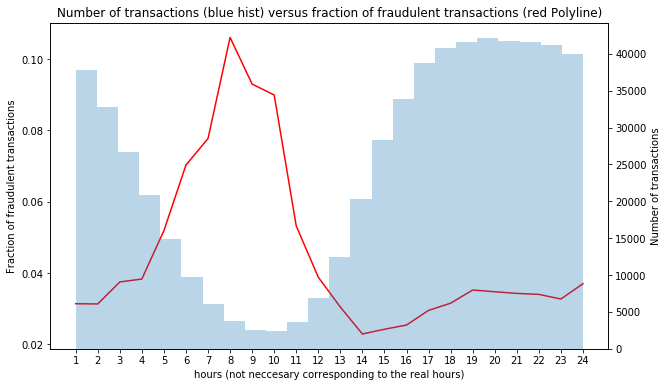

In [34]:
# https://www.kaggle.com/fchmiel/day-and-time-powerful-predictive-feature
plt.figure(figsize=(10,6))
plt.plot(train.groupby('hour').mean()['isFraud'], color='r')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['hour'], alpha=0.3, bins=24)
ax.set_xlabel('hours (not neccesary corresponding to the real hours)')
ax.set_ylabel('Fraction of fraudulent transactions')
ax2.set_ylabel('Number of transactions')
plt.title('Number of transactions (blue hist) versus fraction of fraudulent transactions (red Polyline)')
plt.xticks(np.arange(1, 25, 1))
plt.show()

From the graph above, it seems that from 4am to 12pm the fraction of fraud is significantly higher than other hours. From 2pm (14) to 4pm (16), the fractions of fraud is the lowest. While from 7am to 10am the fraction is the highest. So we can create a new feature in terms of this.

In [35]:
def new_hr_feature(hr):
    if hr >= 7 and hr < 10:
        return "highwarningsign"
    if hr >= 14 and hr < 16:
        return "lowestwarningsign"
    if (hr >= 4 and hr < 7) or (hr >= 10 and hr < 14):
        return "mediumwarningsign"
    else:
        return "lowwarningsign"
    
train['hour_warning'] = train['hour'].apply(new_hr_feature)
test['hour_warning'] = test['hour'].apply(new_hr_feature)

### TransactionAmt

In [37]:
# Reference: https://github.com/KaustuvDash/IEEE-Fraud-Detection
def describe(datatrain,datatest,feature):
    d = pd.DataFrame(columns=[feature,'Train','TrainFraud','TrainLegit','Test'])
    d[feature] = ['count','mean','std','min','25%','50%','75%','max','unique','NaN','NaNshare']
    for i in range(0,8):
        d['Train'].iloc[i] = datatrain[feature].describe().iloc[i]
        d['TrainFraud'].iloc[i]=datatrain[datatrain['isFraud']==1][feature].describe().iloc[i]
        d['TrainLegit'].iloc[i]=datatrain[datatrain['isFraud']==0][feature].describe().iloc[i]
        d['Test'].iloc[i]=datatest[feature].describe().iloc[i]
    d['Train'].iloc[8] = len(datatrain[feature].unique())
    d['TrainFraud'].iloc[8]=len(datatrain[datatrain['isFraud']==1][feature].unique())
    d['TrainLegit'].iloc[8]=len(datatrain[datatrain['isFraud']==0][feature].unique())
    d['Test'].iloc[8]=len(datatest[feature].unique())
    d['Train'].iloc[9] = datatrain[feature].isnull().sum()
    d['TrainFraud'].iloc[9] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()
    d['TrainLegit'].iloc[9] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()
    d['Test'].iloc[9]=datatest[feature].isnull().sum()
    d['Train'].iloc[10] = datatrain[feature].isnull().sum()/len(datatrain)
    d['TrainFraud'].iloc[10] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==1])
    d['TrainLegit'].iloc[10] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==0])
    d['Test'].iloc[10]=datatest[feature].isnull().sum()/len(datatest)
    return d

In [38]:
describe(train, test, 'TransactionAmt')

TransactionAmt    Train TrainFraud TrainLegit     Test
0           count   590540      20663     569877   506691
1            mean  135.027    149.245    134.512  134.726
2             std  239.163    232.212    239.395   245.78
3             min    0.251      0.292      0.251    0.018
4             25%   43.321     35.044      43.97       40
5             50%   68.769         75       68.5    67.95
6             75%      125        161        120      125
7             max  31937.4       5191    31937.4    10270
8          unique    20902       2515      20560    14119
9             NaN        0          0          0        0
10       NaNshare        0          0          0        0

The max value of train is three times than test. It might be caused by an outlier. Let's check if there are outliers in train.

In [30]:
train[train.TransactionAmt>10000]

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
274336        3261336        0        6652360       31937.391         W   
274339        3261339        0        6652391       31937.391         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
274336  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0   
274339  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
274336    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0   
274339    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12  C13  C14   D1  D2   D3   D4   D5  D6  D7  D8  \
274336  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN   
274339  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN   

        D9  D10  D11  D12  D13  D14  D15 M1 M2 M3   M4       ...       V333  \
274336 NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN       ...        NaN   
274339 NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN       ...        NaN   

       V334 V335 V336 V337  V338  V339  id_01  id_02  id_03  id_04  id_05  \
274336  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
274339  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   

        id_06  id_07  id_08  id_09  id_10  id_11  id_12  id_13  id_14  id_15  \
274336    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
274339    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        id_16  id_17  id_18  id_19  id_20  id_21  id_22  id_23  id_24  id_25  \
274336    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
274339    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        id_26  id_27  id_28  id_29  id_30  id_31  id_32  id_33  id_34  id_35  \
274336    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
274339    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        id_36  id_37  id_38  DeviceType  DeviceInfo  day  hour    hour_warning  
274336    NaN    NaN    NaN         NaN         NaN    6    24  lowwarningsign  
274339    NaN    NaN    NaN         NaN         NaN    6    24  lowwarningsign  

[2 rows x 436 columns]

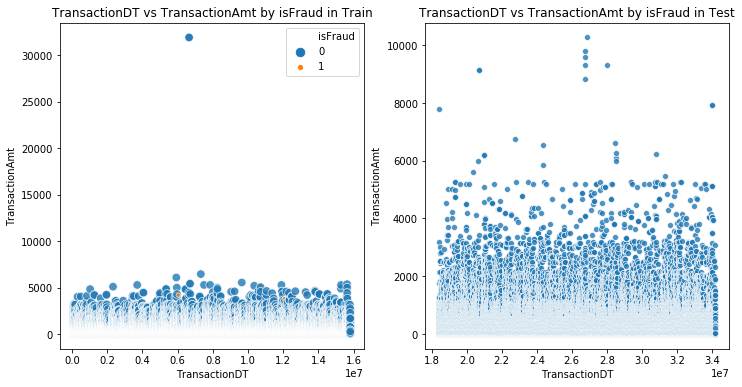

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g1 = sns.scatterplot(x="TransactionDT",y="TransactionAmt",hue="isFraud",size="isFraud",data=train, alpha=0.8, hue_order=[0,1])
plt.title('TransactionDT vs TransactionAmt by isFraud in Train')
plt.subplot(1,2,2)
sns.scatterplot(x="TransactionDT",y="TransactionAmt", data=test, alpha=0.8, hue_order=[0,1])
plt.title('TransactionDT vs TransactionAmt by isFraud in Test')
plt.show()

In [40]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
TransactionAmt_IQR = IQR[3]
TransactionAmt_Q1 = Q1[3]
TransactionAmt_Q3 = Q3[3]
print('There are %d observations are outliers lower than Q1 - 3*IQR' %len(train['TransactionAmt'][train['TransactionAmt'] < (TransactionAmt_Q1 - 3 * TransactionAmt_IQR)]))
print('There are %d observations are outliers higher than Q3 + 3*IQR' % len(train['TransactionAmt'][train['TransactionAmt'] > (TransactionAmt_Q3 + 3 * TransactionAmt_IQR)]))

There are 0 observations are outliers lower than Q1 - 3*IQR
There are 36422 observations are outliers higher than Q3 + 3*IQR


In [41]:
train.drop(train[train.TransactionAmt>10000].index, axis=0, inplace=True)

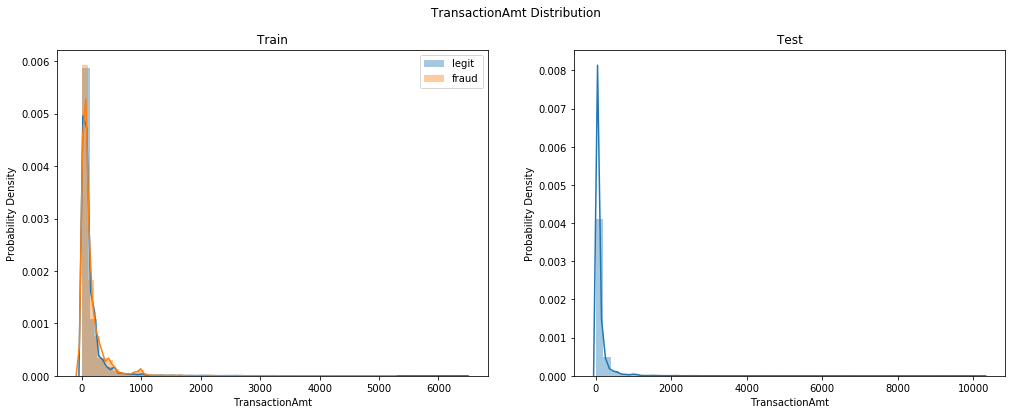

In [42]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.distplot(train[train['isFraud']==0]['TransactionAmt'])
sns.distplot(train[train['isFraud']==1]['TransactionAmt'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('TransactionAmt Distribution' , fontsize=12)
plt.subplot(1,2,2)
sns.distplot(test['TransactionAmt'])
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

Due to the extreme high values in TransactionAmt, we should take a log to transform in order to better visualize it.

In [43]:
train['LogTransactionAmt'] = np.log(train['TransactionAmt'])
test['LogTransactionAmt'] = np.log(test['TransactionAmt'])

In [44]:
log_std = train.LogTransactionAmt.std()
log_mean = train.LogTransactionAmt.mean()
log_mean - 1*log_std

3.409869049878078

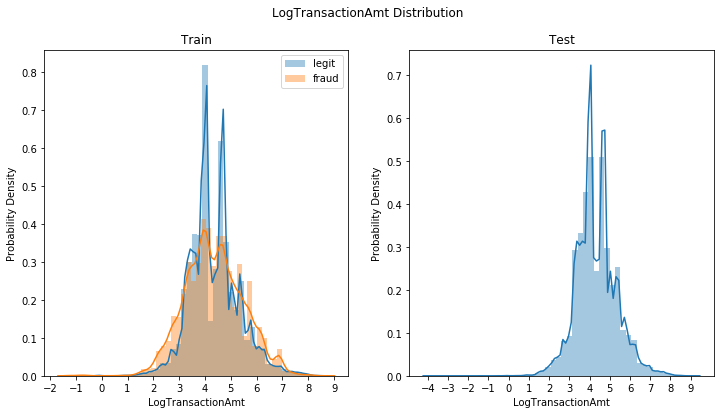

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train[train['isFraud']==0]['LogTransactionAmt'])
sns.distplot(train[train['isFraud']==1]['LogTransactionAmt'])
plt.xticks(np.arange(-2, 10, 1))
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('LogTransactionAmt Distribution' , fontsize=12)
plt.subplot(1,2,2)
sns.distplot(test['LogTransactionAmt'])
plt.xticks(np.arange(-4, 10, 1))
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

The transactions with LogTransactionAmt larger than 5.5 (244 dollars) and smaller than 3.3 (27 dollars) have higher frequency and probability density being fraudulent. On the other hand, LogTransactionAmt from 3.3 to 5.5 have higher chance being legit.

### ProductCD

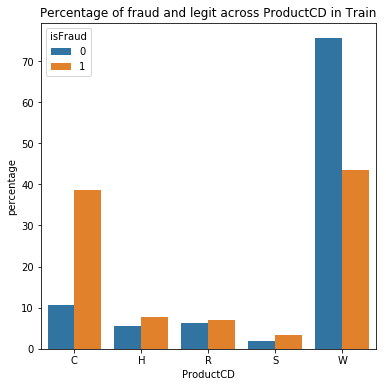

In [46]:
plt.figure(figsize=(6,6))
train_ProductCD = (train.groupby(['isFraud'])['ProductCD'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('ProductCD'))
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD)
plt.title('Percentage of fraud and legit across ProductCD in Train')
plt.show()

From the graph above we can see that if the transaction is fraudulent, there is 40% chance it's Product C (We can't say vice versa). Considering that only 10% of Legit transaction is C, I think there is higher chance that it's a fraud if it's product is C.

### card1

In [41]:
describe(train,test,'card1')

card1    Train TrainFraud TrainLegit     Test
0      count   590538      20663     569875   506691
1       mean  9898.71    9547.65    9911.44  9957.22
2        std  4901.17    4762.05    4905.67  4884.96
3        min     1000       1015       1000     1001
4        25%     6019     5732.5       6019     6019
5        50%     9678       9633       9711     9803
6        75%  14182.8      13623      14229    14276
7        max    18396      18375      18396    18397
8     unique    13553       1740      13350    13244
9        NaN        0          0          0        0
10  NaNshare        0          0          0        0

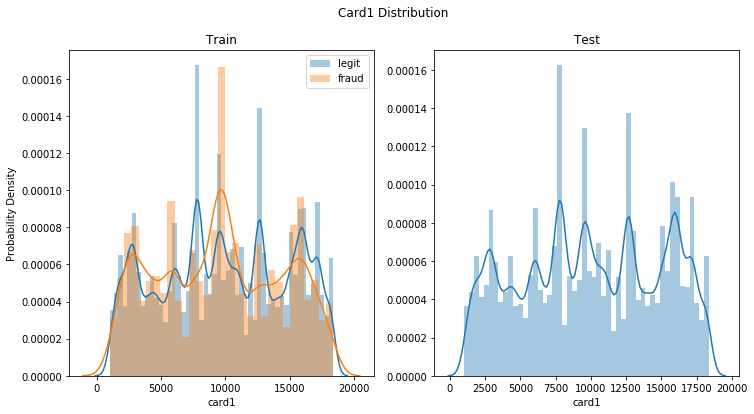

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train[train['isFraud']==0]['card1'])
sns.distplot(train[train['isFraud']==1]['card1'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.suptitle('Card1 Distribution' , fontsize=12)
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test['card1'])
plt.title('Test')
plt.show()

### card2

In [43]:
gc.collect()

46214

In [44]:
describe(train,test,'card2')

card2      Train TrainFraud TrainLegit       Test
0      count     581605      20240     561365     498037
1       mean    362.555    365.371    362.453    363.735
2        std    157.793    159.624    157.726    158.689
3        min        100        100        100        100
4        25%        214        204        215        207
5        50%        361        375        361        369
6        75%        512        514        512        512
7        max        600        600        600        600
8     unique        501        328        501        498
9        NaN       8933        423       8510       8654
10  NaNshare  0.0151269  0.0204714  0.0149331  0.0170794

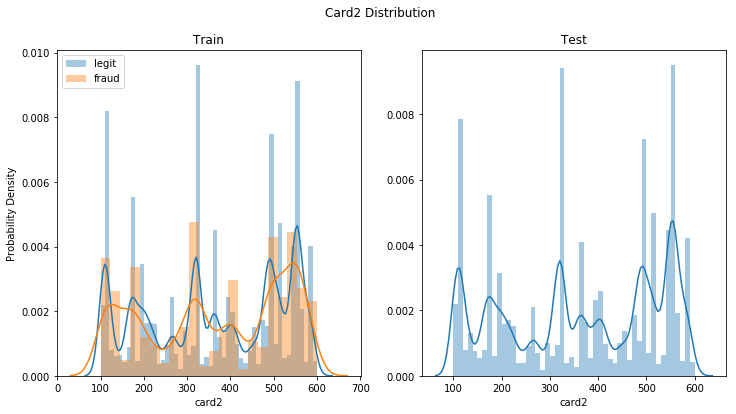

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['card2'].isnull())]['card2'])
sns.distplot(train[(train['isFraud']==1) & (~train['card2'].isnull())]['card2'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('Card2 Distribution' , fontsize=12)
plt.subplot(1,2,2)
sns.distplot(test[~test['card2'].isnull()]['card2'])
plt.title('Test')
plt.show()

### card3

In [46]:
describe(train,test,'card3')

card3       Train  TrainFraud  TrainLegit        Test
0      count      588973       20624      568349      503689
1       mean     153.195     162.369     152.862     153.543
2        std     11.3365     17.4958     10.9044      12.443
3        min         100         100         100         100
4        25%         150         150         150         150
5        50%         150         150         150         150
6        75%         150         185         150         150
7        max         231         231         231         232
8     unique         115          63         107         116
9        NaN        1565          39        1526        3002
10  NaNshare  0.00265013  0.00188743  0.00267778  0.00592472

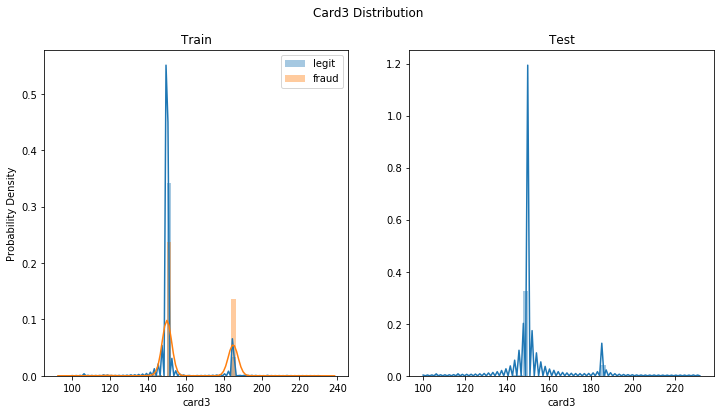

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['card3'].isnull())]['card3'])
sns.distplot(train[(train['isFraud']==1) & (~train['card3'].isnull())]['card3'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('Card3 Distribution', fontsize=12)
plt.subplot(1,2,2)
sns.distplot(test[~test['card3'].isnull()]['card3'])
plt.title('Test')
plt.show()

Apparently card3 is a categorical variable. As the values around 150 have higher chances being legit we can create a new feature that categorize card3

In [47]:
def new_card3(row):
    if row==np.nan:
        return row
    else:
        if row > 160:
            return 'Positive'
        else:
            return 'Negative'
        
train['new_card3'] = train['card3'].apply(new_card3)
test['new_card3'] = train['card3'].apply(new_card3)

### card4

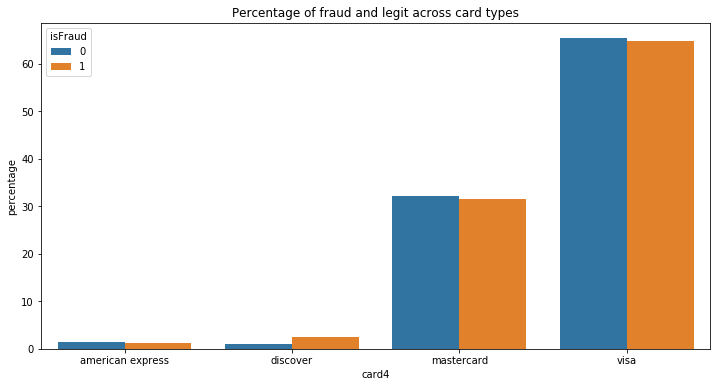

In [50]:
plt.figure(figsize=(12,6))
train_card4 = (train[~train['card4'].isnull()].groupby(['isFraud'])['card4'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4)
plt.title('Percentage of fraud and legit across card types')
plt.show()

Most of the transactions completed by visa and mastercard card types.

### card5

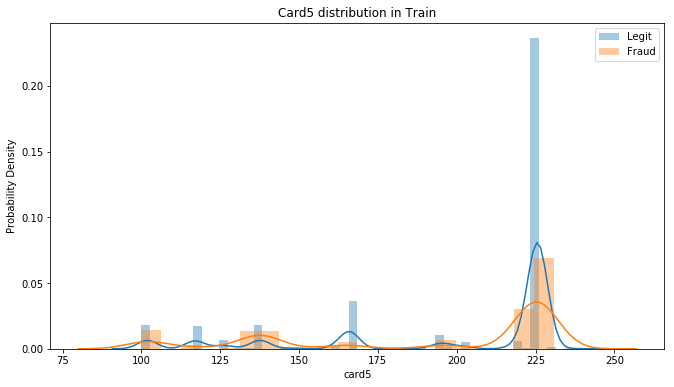

In [51]:
plt.figure(figsize=(11,6))
sns.distplot(train[(train['isFraud']==0) & (~train['card5'].isnull())]['card5'])
sns.distplot(train[(train['isFraud']==1) & (~train['card5'].isnull())]['card5'])
plt.legend(['Legit','Fraud'])
plt.ylabel('Probability Density')
plt.title('Card5 distribution in Train')
plt.show()

### card6

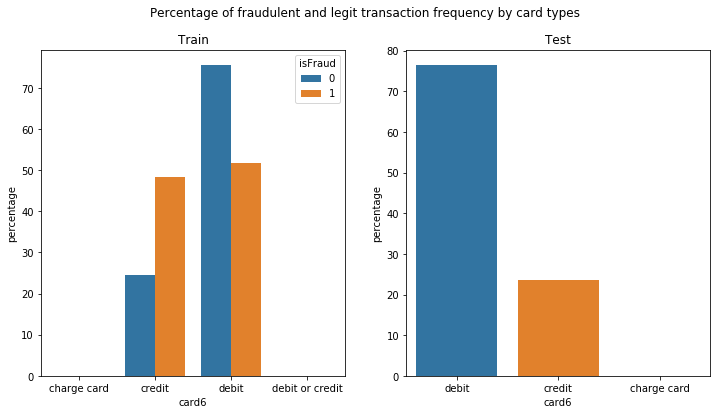

In [55]:
# Rerun this before replacement
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_card6 = (train[~train['card6'].isnull()].groupby(['isFraud'])['card6'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6)
plt.title('Train')
plt.subplot(1,2,2)
test_card6 =test[~test['card6'].isnull()]['card6'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index", y="percentage", data=test_card6)
plt.xlabel('card6')
plt.title('Test')
plt.suptitle('Percentage of fraudulent and legit transaction frequency by card types', fontsize=12)
plt.show()

In [48]:
print('%d observations are charge card' % train[train['card6']=='charge card'].shape[0])
print('%d observations are debit or credit card' % train[train['card6']=='debit or credit'].shape[0])

15 observations are charge card
30 observations are debit or credit card


There are nearly no observations in 'charge card' and 'debit or credit' and there is no 'debit or credit' in Test dataset. As the sample size is not enough for finding general pattern, and the majority card6 type is debit, we can replace these observations to 'debit' type.

In [49]:
def replacetodebit(row):
    if row==np.nan:
        return row
    if row=='debit or credit' or row=='charge card':
        return 'debit'
    else:
        return row
    
train['card6'] = train['card6'].apply(replacetodebit)
test['card6'] = test['card6'].apply(replacetodebit)

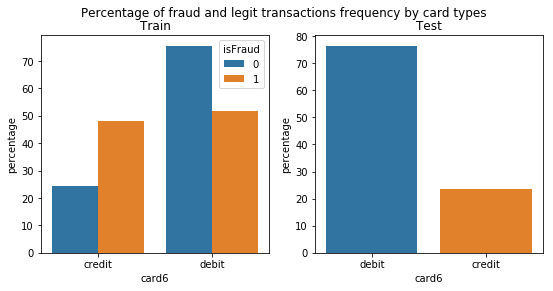

In [50]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
train_card6 = (train[~train['card6'].isnull()].groupby(['isFraud'])['card6'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6)
plt.title('Train')
plt.subplot(1,2,2)
test_card6 =test[~test['card6'].isnull()]['card6'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index", y="percentage", data=test_card6)
plt.xlabel('card6')
plt.title('Test')
plt.suptitle('Percentage of fraud and legit transactions frequency by card types', fontsize=12)
plt.show()

### addr1 and addr2
From Hoster: addr1 - Purchaser Region, addr2 - Purchaser Billing Country

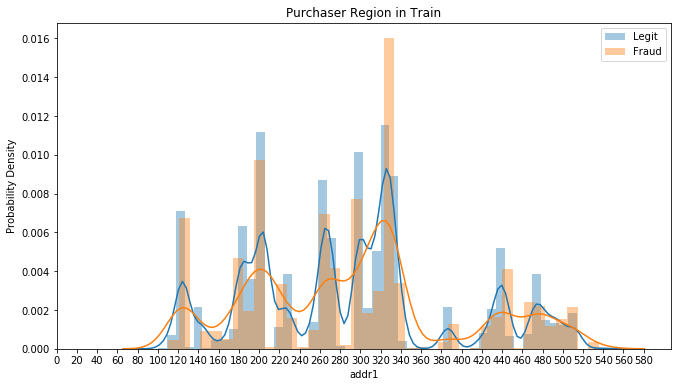

In [60]:
plt.figure(figsize=(11,6))
sns.distplot(train[(train['isFraud']==0) & (~train['addr1'].isnull())]['addr1'])
sns.distplot(train[(train['isFraud']==1) & (~train['addr1'].isnull())]['addr1'])
plt.legend(['Legit','Fraud'])
plt.xticks(np.arange(0, 600, 20))
plt.ylabel('Probability Density')
plt.title('Purchaser Region in Train')
plt.show()

330-340 seems have higher frequency of fraud

In [61]:
print('There are %d regions in addr1 of Train' % len(train['addr1'].value_counts()))
print(train['addr1'].value_counts().head(5))
print('There are %d regions in addr1 of Test' % len(test['addr1'].value_counts()))
print(test['addr1'].value_counts().head(5))

There are 332 regions in addr1 of Train
299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
Name: addr1, dtype: int64
There are 292 regions in addr1 of Test
299.0    38710
204.0    35049
325.0    34151
264.0    32710
330.0    22100
Name: addr1, dtype: int64


There are 332 and 292 regions in addr1 of Train and Test

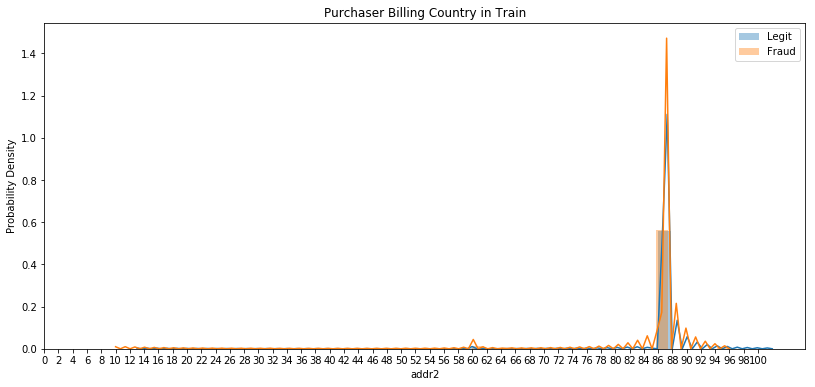

In [62]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
sns.distplot(train[(train['isFraud']==0) & (~train['addr2'].isnull())]['addr2'])
sns.distplot(train[(train['isFraud']==1) & (~train['addr2'].isnull())]['addr2'])
plt.legend(['Legit','Fraud'])
plt.ylabel('Probability Density')
plt.xticks(np.arange(0, 102, 2))
plt.title('Purchaser Billing Country in Train')
plt.show()

Except 87, 60, 96, the sample size of each address is not enough 

In [63]:
print('There are %d billing countries in addr2 of Train. And the country 87 accounts for %.2f%%' % (len(train['addr2'].value_counts()), train['addr2'].value_counts().values[0] / len(train['addr2'])*100))
print(train['addr2'].value_counts().head(5))
print('There are %d billing countries in addr2 of Test. And the country 87 accounts for  %.2f%%' % (len(test['addr2'].value_counts()), test['addr2'].value_counts().values[0] / len(test['addr2'])*100))
print(test['addr2'].value_counts().head(5))

There are 74 billing countries in addr2 of Train. And the country 87 accounts for 88.14%
87.0    520479
60.0      3084
96.0       638
32.0        91
65.0        82
Name: addr2, dtype: int64
There are 72 billing countries in addr2 of Test. And the country 87 accounts for  86.04%
87.0    435934
60.0      4041
96.0       608
32.0        61
65.0        49
Name: addr2, dtype: int64


There are 74 billing countries in Train and 72 in test in total. The country 87 accounts for around 87% of transactions. The majority of purchaser billing country is from 87.0, which believed is the United States.

### dist1 and dist2

dist1

In [ ]:
describe(train,test,'dist1')

TrainFraud has higher average dist1 than TrainLegit. I guess Scammers usually commit fraud in a relative longer distance from cardholder's address.

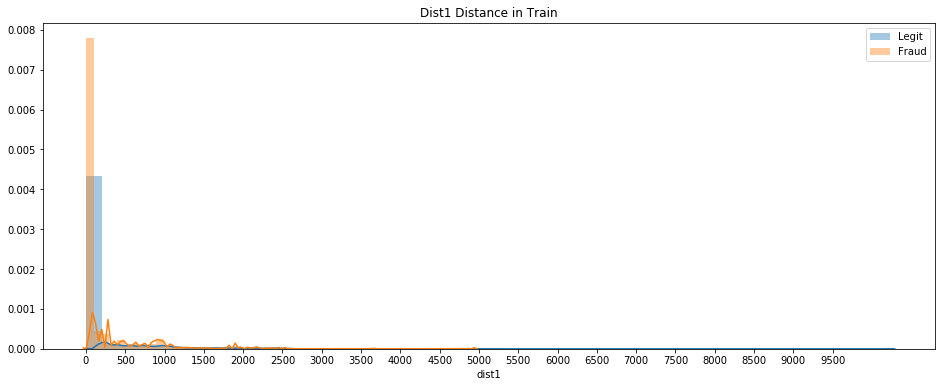

In [64]:
plt.figure(figsize=(16,6))
sns.distplot(train[(train['isFraud']==0) & (~train['dist1'].isnull())]['dist1'])
sns.distplot(train[(train['isFraud']==1) & (~train['dist1'].isnull())]['dist1'])
plt.legend(['Legit','Fraud'])
plt.xticks(np.arange(0, 10000, 500))
plt.title('Dist1 Distance in Train')
plt.show()

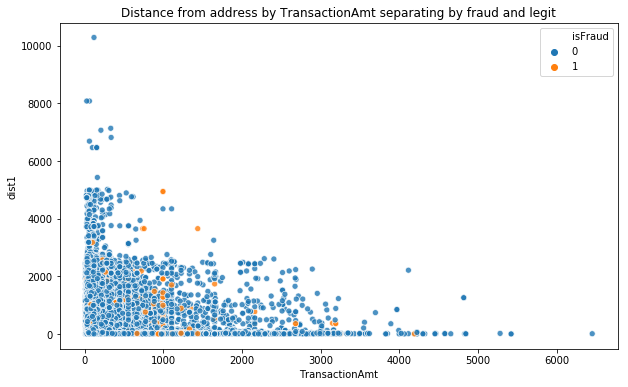

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="TransactionAmt",y="dist1",hue="isFraud",data=train[~train['dist1'].isnull()], alpha=0.8, hue_order=[0,1])
plt.title('Distance from address by TransactionAmt separating by fraud and legit')
plt.show()

It's clear that observations dist1 > 6000 are outliers in Train so let's remove them

In [51]:
train.drop(train[train.dist1>6000].index, axis=0, inplace=True)

dist2

In [67]:
describe(train,test,'dist2')

dist2     Train TrainFraud TrainLegit     Test
0      count     37627       3731      33896    36436
1       mean   231.855    201.472      235.2  237.175
2        std   529.053     451.59    536.798  556.451
3        min         0          0          0        0
4        25%         7          7          7        7
5        50%        37         49         36       44
6        75%       206        233        206      196
7        max     11623       9337      11623     9213
8     unique      1752        345       1724     1815
9        NaN    552900      16932     535968   470255
10  NaNshare  0.936282   0.819436   0.940519  0.92809

large percentages of missing values (93%)

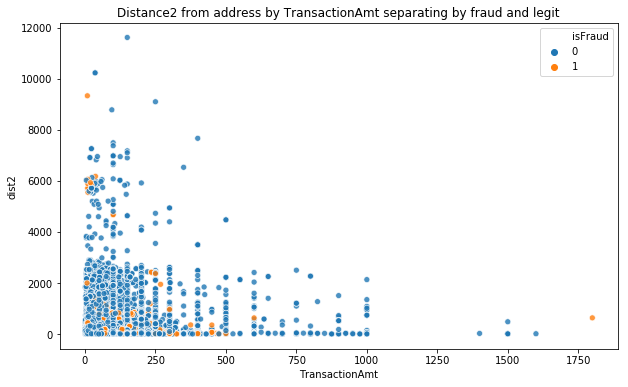

In [68]:
# need to be rerun before drop
plt.figure(figsize=(10,6))
sns.scatterplot(x="TransactionAmt",y="dist2",hue="isFraud",data=train[~train['dist2'].isnull()],alpha=0.8,hue_order=[0,1])
plt.title('Distance2 from address by TransactionAmt separating by fraud and legit')
plt.show()

It's clear that observations dist2 > 8000 are outliers in Train so let's remove them

In [52]:
train.drop(train[train.dist2>8000].index, axis=0, inplace=True)

### P_emaildomain and R_emaildomain
purchaser and recipient email domain

In [53]:
train['R_emaildomain'].value_counts().head(10)

gmail.com        57144
hotmail.com      27509
anonymous.com    20527
yahoo.com        11841
aol.com           3701
outlook.com       2507
comcast.net       1812
yahoo.com.mx      1508
icloud.com        1398
msn.com            852
Name: R_emaildomain, dtype: int64

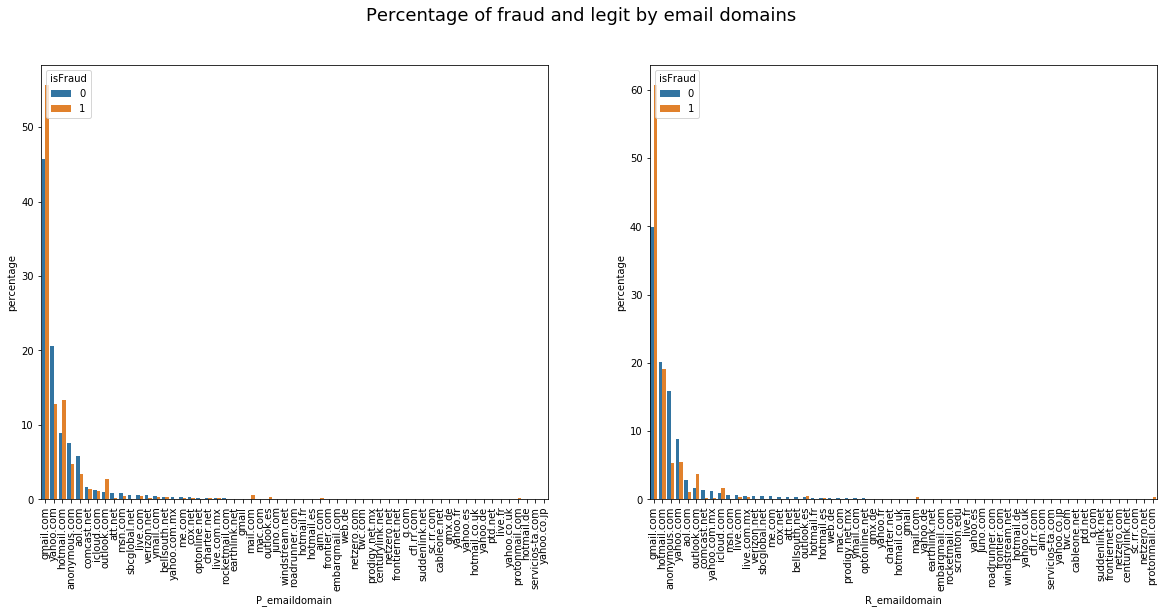

In [54]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
train_P_email = (train[~train['P_emaildomain'].isnull()].groupby(['isFraud'])['P_emaildomain'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x="P_emaildomain", y="percentage", hue="isFraud", data=train_P_email)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
train_R_email = train[~train['R_emaildomain'].isnull()].groupby(['isFraud'])['R_emaildomain'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="R_emaildomain", y="percentage", hue="isFraud", data=train_R_email)
plt.xticks(rotation=90)
plt.suptitle('Percentage of fraud and legit by email domains', fontsize=18)
plt.show()

Let's combine group all e-mail domains by the respective enterprises and set all values with less than 500 entries as "Others". Also fill NaN by 'NoInf'.

In [55]:
# Reference: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook#Ploting-Transaction-Amount-Values-Distribution
train.loc[train['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'
train.loc[train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo'
train.loc[train['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train.loc[train.P_emaildomain.isin(train.P_emaildomain.value_counts()[train.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"
train.P_emaildomain.fillna("NoInf", inplace=True)

train.loc[train['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train.loc[train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo'
train.loc[train['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train.loc[train.R_emaildomain.isin(train.R_emaildomain.value_counts()[train.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"
train.R_emaildomain.fillna("NoInf", inplace=True)

In [56]:
test.loc[test['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'
test.loc[test['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo'
test.loc[test['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
test.loc[test.P_emaildomain.isin(test.P_emaildomain.value_counts()[test.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"
test.P_emaildomain.fillna("NoInf", inplace=True)

test.loc[test['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

test.loc[test['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo'
test.loc[test['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
test.loc[test.R_emaildomain.isin(test.R_emaildomain.value_counts()[test.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"
test.R_emaildomain.fillna("NoInf", inplace=True)

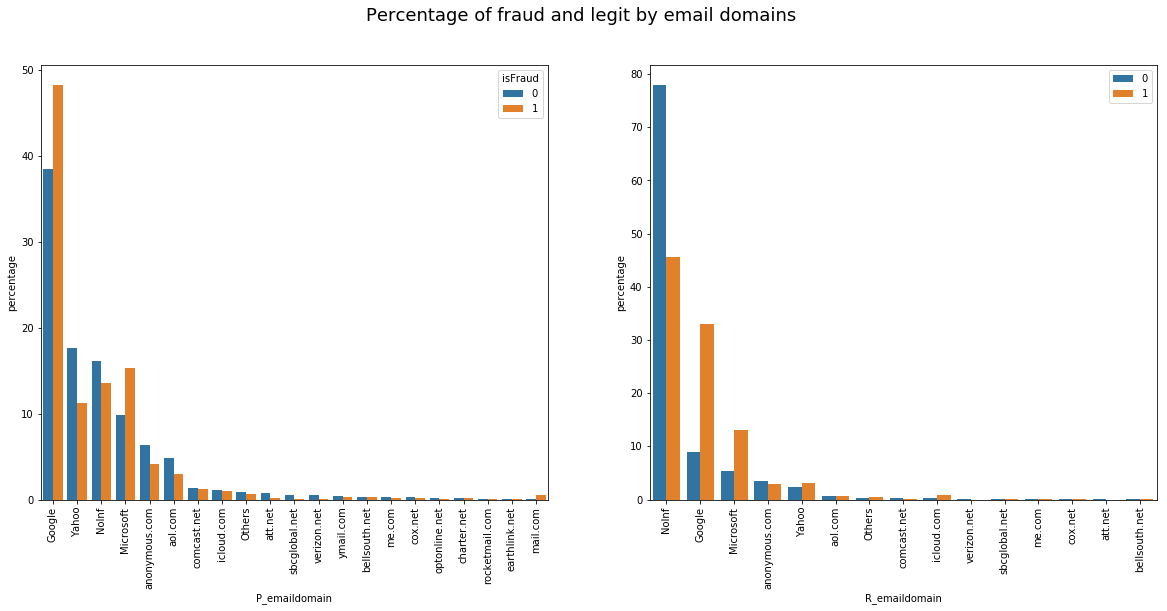

In [57]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
train_P_email = (train[~train['P_emaildomain'].isnull()].groupby(['isFraud'])['P_emaildomain'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x="P_emaildomain", y="percentage", hue="isFraud", data=train_P_email)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
train_R_email = train[~train['R_emaildomain'].isnull()].groupby(['isFraud'])['R_emaildomain'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="R_emaildomain", y="percentage", hue="isFraud", data=train_R_email)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.suptitle('Percentage of fraud and legit by email domains', fontsize=18)
plt.show()

In [77]:
gc.collect()

14763

### C1-C14
Continuous variables.

Meaning: Counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked. 

Let's take a look of their distribution, description, and scatterplot for outliers.

C1-C14 don't have any missing value in Train but only 3 in Test, which is good. 

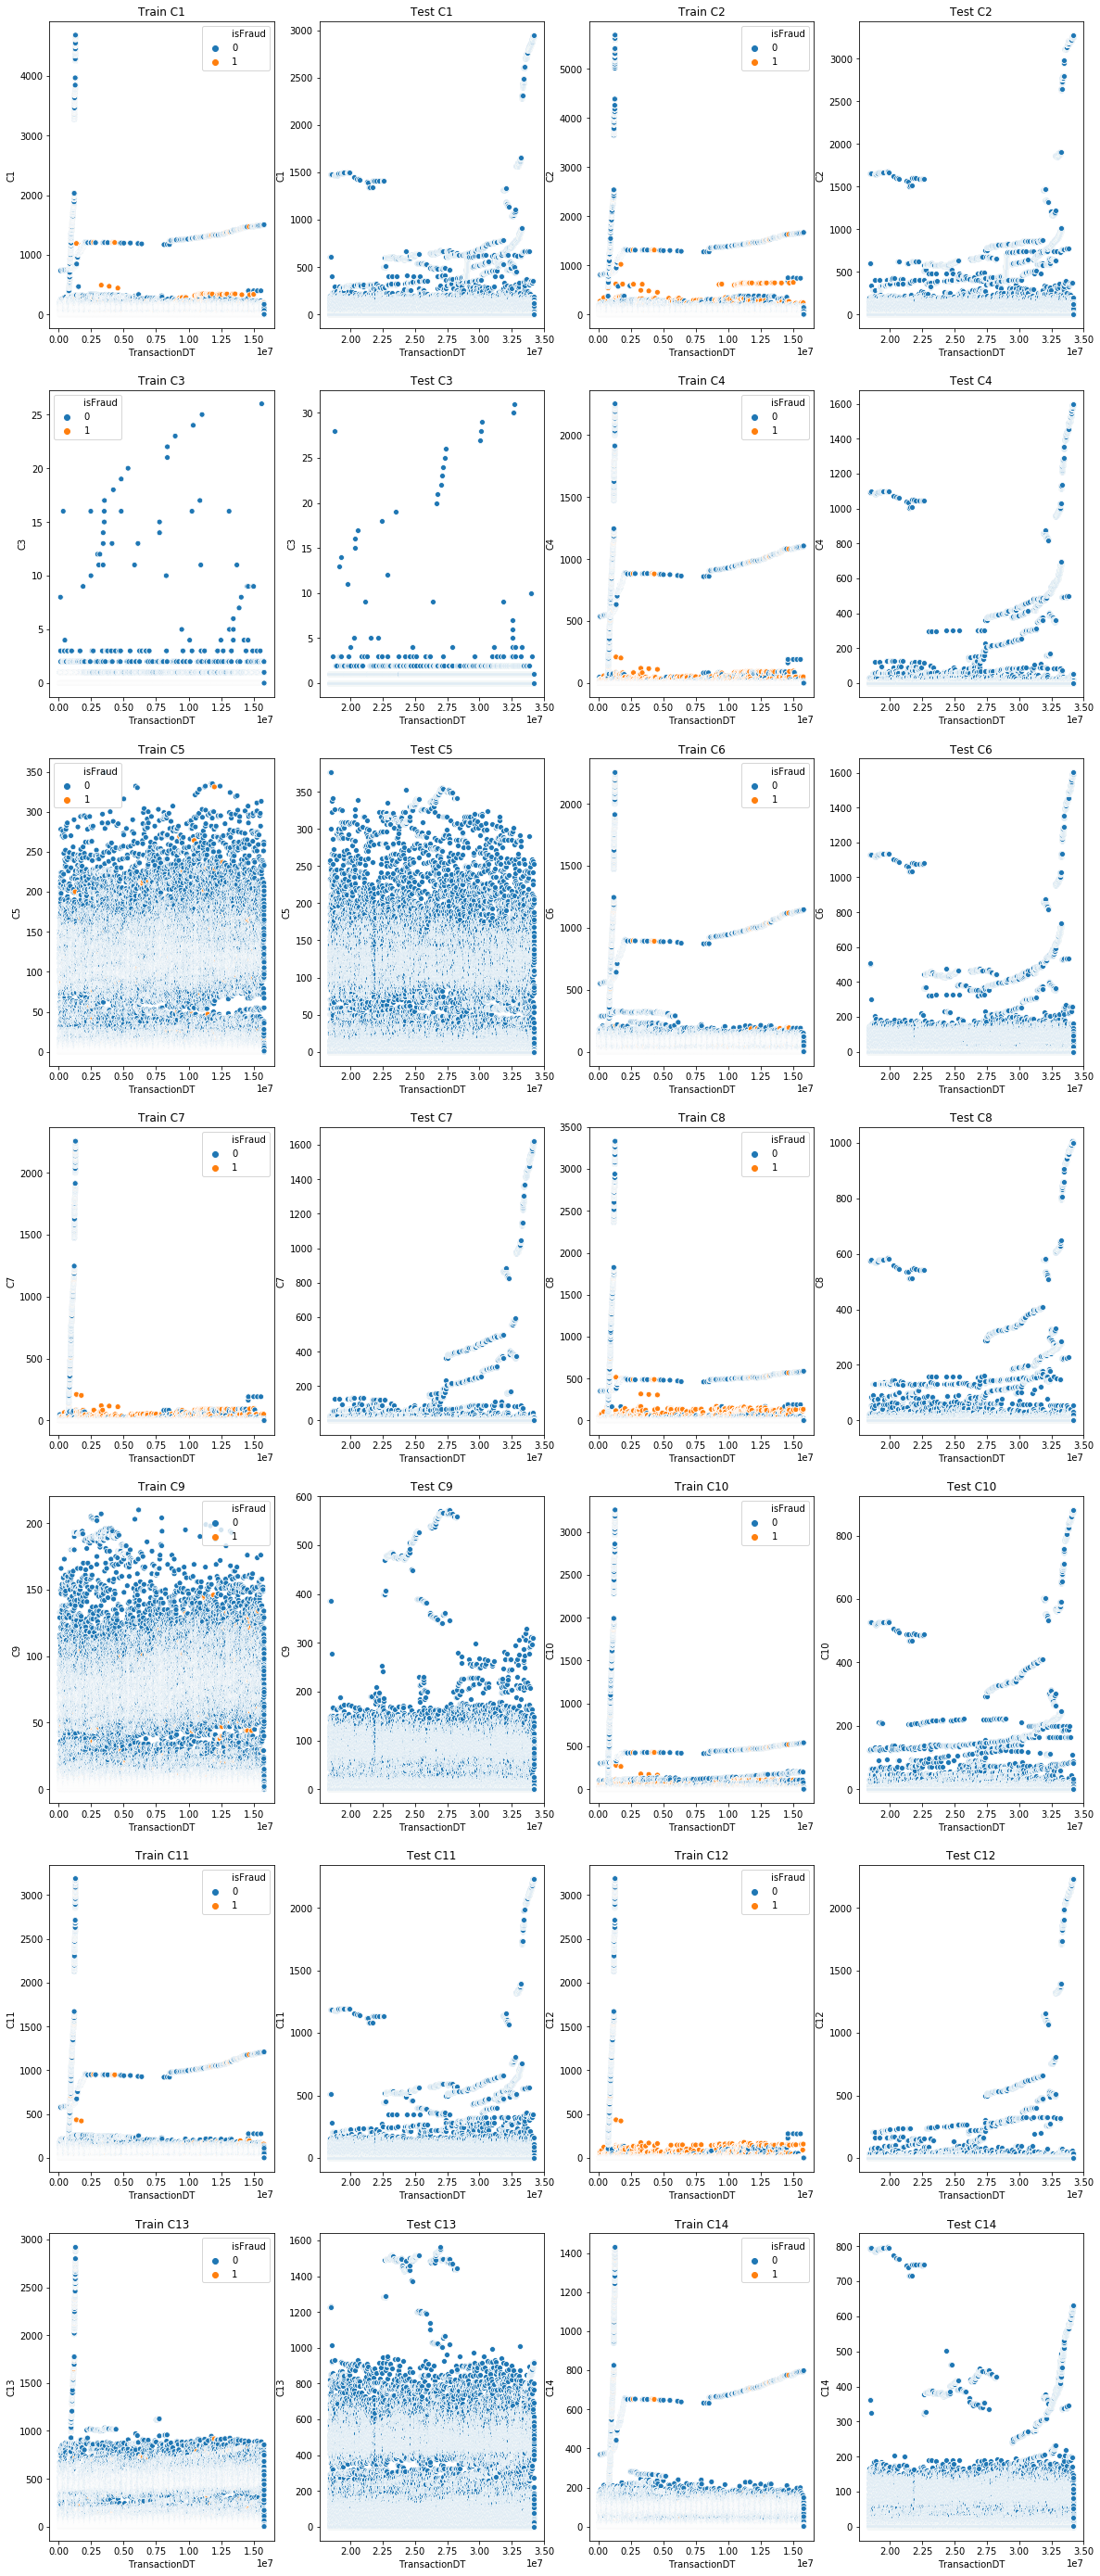

In [78]:
# Rerun before dropping outliers
plt.figure(figsize=(20,50))
var = ['C' + str(i) for i in range(1,15)]
i = 1
for col in var:
    plt.subplot(7,4,i)
    sns.scatterplot(x="TransactionDT",y=col,hue="isFraud",data=train[~train[col].isnull()])
    plt.title('Train '+ col)
    i += 1
    plt.subplot(7,4,i)
    sns.scatterplot(x="TransactionDT",y=col,data=test[~test[col].isnull()])
    plt.title('Test '+ col)
    i += 1
plt.show()

In [ ]:
# train[train['C1'] > 2000] # 1196912 - 1199904DT day6
# train[train['C2'] > 2000] # 1028102 - 1199904DT day4-6
# train[train['C4'] > 1200] # ....... - 1199904DT day4-6

- C5 and C9 don't have outliers
- Other C features have extreme outliers where TransactionDT in range of around 1028000 - 1199904DT, day 4-6. A large amount of addresses are found to be associated with the payment card in this time range.

We see similar outliers in the end of TransactionDT Test

Let's remove some outliers

In [58]:
train.drop(train[train.C1>3000].index, axis=0, inplace=True)
train.drop(train[train.C2>3000].index, axis=0, inplace=True)
train.drop(train[train.C7>1400].index, axis=0, inplace=True)
train.drop(train[train.C4>1400].index, axis=0, inplace=True)
train.drop(train[train.C6>1400].index, axis=0, inplace=True)
train.drop(train[train.C7>1400].index, axis=0, inplace=True)
train.drop(train[train.C8>1000].index, axis=0, inplace=True)
train.drop(train[train.C10>1000].index, axis=0, inplace=True)
train.drop(train[train.C11>2000].index, axis=0, inplace=True)
train.drop(train[train.C12>2000].index, axis=0, inplace=True)
train.drop(train[train.C13>1200].index, axis=0, inplace=True)
train.drop(train[train.C14>800].index, axis=0, inplace=True)

In [59]:
var = ['C' + str(i) + '_desc' for i in range(1,15)]
col = ['C' + str(i) for i in range(1,15)]
frame = []
def des(var,col):
    for i, j in zip(var,col):
        i = describe(train,test,j)
        frame.append(i)

    return pd.concat(frame, axis=1)

des(var,col)

C1    Train TrainFraud TrainLegit         Test        C2    Train  \
0      count   589527      20548     568979       506688     count   589527   
1       mean  9.47612    20.0712    9.09349      10.0932      mean  9.81174   
2        std  52.9324    89.3517    51.0932      79.3348       std  60.1071   
3        min        0          0          0            0       min        0   
4        25%        1          1          1            1       25%        1   
5        50%        1          2          1            1       50%        1   
6        75%        3          6          3            3       75%        3   
7        max     1505       1494       1505         2950       max     1670   
8     unique      988        395        918         1175    unique      958   
9        NaN        0          0          0            3       NaN        0   
10  NaNshare        0          0          0  5.92077e-06  NaNshare        0   

   TrainFraud TrainLegit         Test        C3       Train   TrainFraud  \
0       20548     568979       506688     count      589527        20548   
1     27.1878    9.18423      10.7146      mean  0.00565369  0.000243333   
2     116.023     56.973      88.8969       std    0.150665    0.0155976   
3           0          0            0       min           0            0   
4           1          1            1       25%           0            0   
5           2          1            1       50%           0            0   
6           7          3            3       75%           0            0   
7        1657       1670         3275       max          26            1   
8         474        824         1124    unique          27            2   
9           0          0            3       NaN           0            0   
10          0          0  5.92077e-06  NaNshare           0            0   

    TrainLegit         Test        C4    Train TrainFraud TrainLegit  \
0       568979       506688     count   589527      20548     568979   
1   0.00584907    0.0274035      mean  1.73671    7.09651    1.54315   
2     0.153329     0.227753       std  32.2674    54.8537    31.1296   
3            0            0       min        0          0          0   
4            0            0       25%        0          0          0   
5            0            0       50%        0          1          0   
6            0            0       75%        0          2          0   
7           26           31       max     1107       1098       1107   
8           27           32    unique      699        137        659   
9            0            3       NaN        0          0          0   
10           0  5.92077e-06  NaNshare        0          0          0   

           Test        C5    Train TrainFraud TrainLegit         Test  \
0        506688     count   589527      20548     568979       506688   
1       2.38587      mean  5.58109    1.41459    5.73156       4.9627   
2        41.943       std  25.8081    12.9818    26.1415      25.4622   
3             0       min        0          0          0            0   
4             0       25%        0          0          0            0   
5             0       50%        0          0          0            0   
6             1       75%        1          0          1            1   
7          1601       max      349        331        349          376   
8           729    unique      319        124        319          354   
9             3       NaN        0          0          0            3   
10  5.92077e-06  NaNshare        0          0          0  5.92077e-06   

          C6    Train TrainFraud TrainLegit         Test        C7     Train  \
0      count   589527      20548     568979       506688     count    589527   
1       mean  6.72412    8.95265    6.64364      6.85499      mean  0.489124   
2        std  37.9293    56.5412    37.0803      46.7836       std   9.94349   
3        min        0          0          0            0       min         0   
4     

C features don't have any missing values in Train, and there are 3 NaN consistently in Test except C13

The means and stds of TrainFraud of C features are significantly different than TrainLegit, mostly larger in TrainFraud, as what we can see from scatterplot above like C7,C8,C12.

In [81]:
gc.collect()

68875

### D1-D15
timedelta, such as days between previous transaction, etc.

The hour of the day is D9: train['D9'] = (train['TransactionDT']%(3600*24)/3600//1)/24.0, reference:https://www.kaggle.com/c/ieee-fraud-detection/discussion/100400#latest-579480;

In [ ]:
train.iloc[:, 31:46].head()

In [60]:
var = ['D' + str(i) + '_desc' for i in range(1,16)]
col = ['D' + str(i) for i in range(1,16)]
frame = []
def des(var,col):
    for i, j in zip(var,col):
        i = describe(train,test,j)
        frame.append(i)

    return pd.concat(frame, axis=1)

des(var,col)

D1       Train  TrainFraud  TrainLegit       Test        D2  \
0      count      588258       20502      567756     500660     count   
1       mean     94.4459     38.7202     96.4581    108.208      mean   
2        std     157.723     100.838     159.033    176.965       std   
3        min           0           0           0          0       min   
4        25%           0           0           0          0       25%   
5        50%           3           0           4          5       50%   
6        75%         122          14         127        148       75%   
7        max         640         637         640        641       max   
8     unique         642         578         642        643    unique   
9        NaN        1269          46        1223       6031       NaN   
10  NaNshare  0.00215257  0.00223866  0.00214946  0.0119027  NaNshare   

       Train TrainFraud TrainLegit      Test        D3     Train TrainFraud  \
0     309448       7854     301594    271922     count    327259       9570   
1    169.639    77.8872    172.029   188.667      mean   28.3367    11.7322   
2    177.338    128.797    177.794     197.1       std   62.3529    42.0043   
3          0          0          0         0       min         0          0   
4         26          2         27        26       25%         1          0   
5         97         16        100       112       50%         8          1   
6        276         95        281       305       75%        27          5   
7        640        637        640       641       max       819        582   
8        642        542        642       643    unique       650        261   
9     280079      12694     267385    234769       NaN    262268      10978   
10  0.475091   0.617773   0.469938  0.463338  NaNshare  0.444879   0.534261   

   TrainLegit      Test        D4     Train TrainFraud TrainLegit      Test  \
0      317689    303549     count    420618      14456     406162    429840   
1     28.8369   33.3947      mean     140.2    72.0409    142.626   175.061   
2     62.7958   82.5582       std   191.194    140.743    192.302   250.417   
3           0         0       min      -122          0       -122         0   
4           1         1       25%         0          0          0         0   
5           8         7       50%        26          1         28        21   
6          28        28       75%       254         60        261       290   
7         819      1076       max       869        667        869      1091   
8         650       888    unique       809        606        809      1057   
9      251290    203142       NaN    168909       6092     162817     76851   
10   0.441651  0.400919  NaNshare  0.286516   0.296477   0.286156  0.151672   

          D5     Train TrainFraud TrainLegit      Test        D6     Train  \
0      count    280198      10797     269401    282316     count     72200   
1       mean   42.3455     13.687    43.4941   50.9778      mean   69.9892   
2        std   89.0023    51.9301     89.981    116.83       std       144   
3        min         0          0          0         0       min       -83   
4        25%         1          0          1         0       25%         0   
5        50%        10          0         10         8       50%         0   
6        75%        32          3         34        34       75%        40   
7        max       819        625        819      1088       max       873   
8     unique       689        340        689       962    unique       830   
9        NaN    309329       9751     299578    224375       NaN    517327   
10  NaNshare  0.524707   0.474547   0.526519  0.442824  NaNshare  0.877529   

   TrainFraud TrainLegit     Test        D7     Train TrainFraud TrainLegit  \
0        7607      64593   124783     count     38424       5707      32717   
1     45.4195    72.8827  82.4431      mean   41.7015    11.2558    47.0123   
2     101.144    147.966  192.868       std   99.8897    46.7

D2,D3,D5,D6,D7,D8,D9,D11,D12,D13,D14 have at least higher than 40% NaNshare

D6-D9, D12-D13 have around 90% of missing value

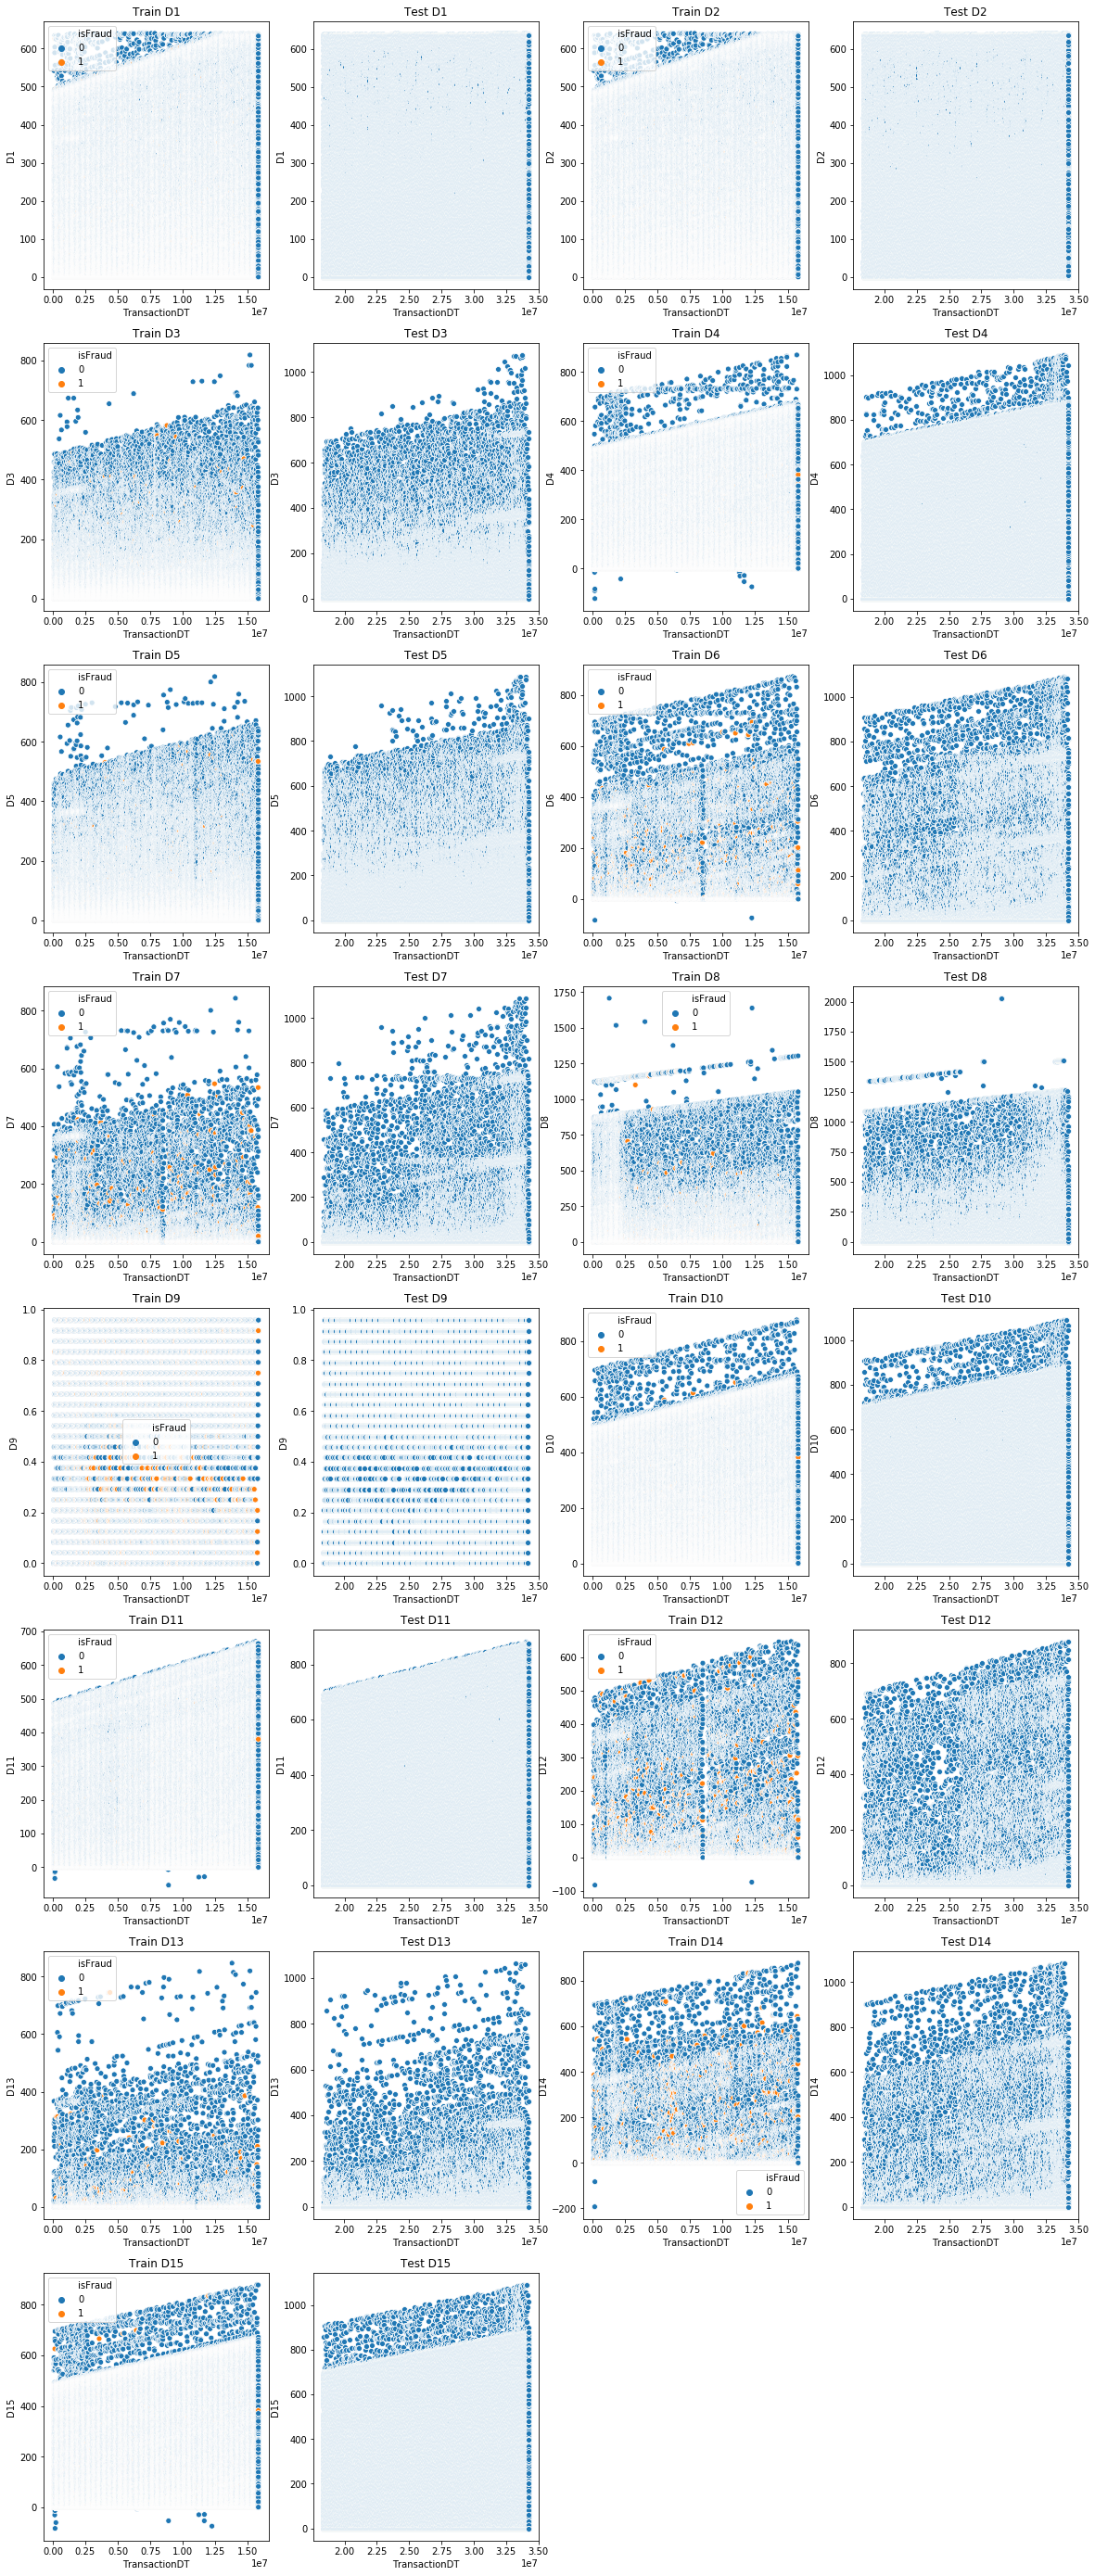

In [83]:
plt.figure(figsize=(20,50))
var = ['D' + str(i) for i in range(1,16)]
i = 1
for col in var:
    plt.subplot(8,4,i)
    sns.scatterplot(x="TransactionDT",y=col,hue="isFraud",data=train[~train[col].isnull()])
    plt.title('Train '+col)
    i += 1
    plt.subplot(8,4,i)
    sns.scatterplot(x="TransactionDT",y=col,data=test[~test[col].isnull()])
    plt.title('Test '+col)
    i += 1
plt.show()


Most of D features are Monotonically increasing with TransactionDT which make sense because they are featured by Vesta claimed as timedelta, such as days between previous transaction, etc.

In [ ]:
gc.collect()

### M1 - M9

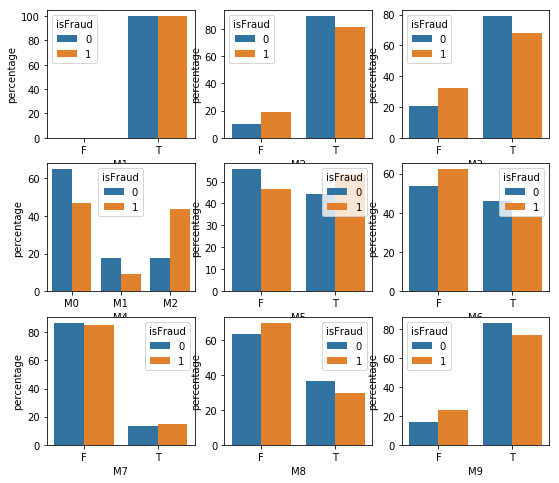

In [61]:
plt.figure(figsize=(9,8))
var = ['train_m' + str(i) for i in range(1,10)]
col = ['M' + str(i) for i in range(1,10)]
for i,j,k in zip(var,col,range(1,10)):
    i = (train.groupby(['isFraud'])[j]
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(j))
    plt.subplot(3,3,k)
    sns.barplot(x=j, y="percentage", hue="isFraud", data=i)
plt.show()

### V features

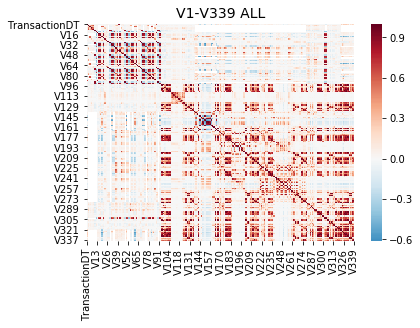

In [63]:
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,340)]
cols.remove('V107')
train2 = train[cols].sample(frac=0.2)
#plt.figure(figsize=(9,7))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 ALL',fontsize=14)
plt.show()

In [64]:
del train2

In [93]:
gc.collect()

42073

### id01 - id38

In [94]:
# 1328 rows without any missing values in id01-id38
print(train[~train.iloc[:, 393:431].isnull().any(axis=1)].iloc[:, 393:431].shape)
train[~train.iloc[:, 393:431].isnull().any(axis=1)].iloc[:, 393:431].head()

(1328, 38)


id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  \
99    -10.0  129080.0    0.0    0.0    9.0  -43.0   22.0  -34.0    0.0    0.0   
188    -5.0   15464.0    0.0    0.0    4.0  -44.0    6.0  -55.0    0.0    0.0   
1702  -20.0  171610.0    0.0    0.0   13.0  -34.0    2.0  -33.0    0.0    0.0   
1706  -20.0   50100.0    0.0    0.0   12.0  -34.0    2.0  -33.0    0.0    0.0   
1714  -55.0   83328.0    0.0    0.0    9.0 -100.0   17.0  -13.0    0.0    0.0   

      id_11     id_12  id_13  id_14  id_15  id_16  id_17  id_18  id_19  id_20  \
99    100.0     Found   49.0 -300.0  Found  Found  166.0   12.0  122.0  549.0   
188   100.0     Found   55.0 -300.0  Found  Found  166.0   13.0  122.0  256.0   
1702  100.0  NotFound   15.0 -300.0  Found  Found  166.0   12.0  317.0  549.0   
1706  100.0     Found   15.0 -300.0  Found  Found  166.0   12.0  317.0  549.0   
1714  100.0  NotFound   11.0 -300.0  Found  Found  166.0   13.0  365.0  489.0   

      id_21  id_22                 id_23  id_24  id_25  id_26  id_27  id_28  \
99    252.0   14.0  IP_PROXY:TRANSPARENT   11.0  321.0  184.0  Found  Found   
188   252.0   14.0  IP_PROXY:TRANSPARENT   11.0  321.0  102.0  Found  Found   
1702  252.0   14.0  IP_PROXY:TRANSPARENT   11.0  321.0  184.0  Found  Found   
1706  252.0   14.0  IP_PROXY:TRANSPARENT   11.0  321.0  184.0  Found  Found   
1714  228.0   14.0  IP_PROXY:TRANSPARENT   11.0  426.0  117.0  Found  Found   

      id_29       id_30                  id_31  id_32      id_33  \
99    Found  iOS 11.0.3  mobile safari generic   32.0   1334x750   
188   Found     Android            chrome 62.0   32.0  2560x1440   
1702  Found  iOS 11.1.2     mobile safari 11.0   32.0  2208x1242   
1706  Found  iOS 11.1.2     mobile safari 11.0   32.0  2208x1242   
1714  Found   Windows 7    ie 11.0 for desktop   24.0   1440x900   

               id_34 id_35 id_36 id_37 id_38  
99    match_status:2     T     F     T     F  
188   match_status:2     T     F     T     T  
1702  match_status:1     T     F     T     T  
1706  match_status:1     T     F     T     T  
1714  match_status:2     T     T     T     T

obj cols: 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'

In [ ]:
# for i in range(1,39):
#     if i < 10:
#         print('Number of categories in the col %s : %d' %(i,len(train['id_0'+str(i)].value_counts().index)))
#     else:
#         print('Number of categories in the col %s : %d' %(i,len(train['id_'+str(i)].value_counts().index)))

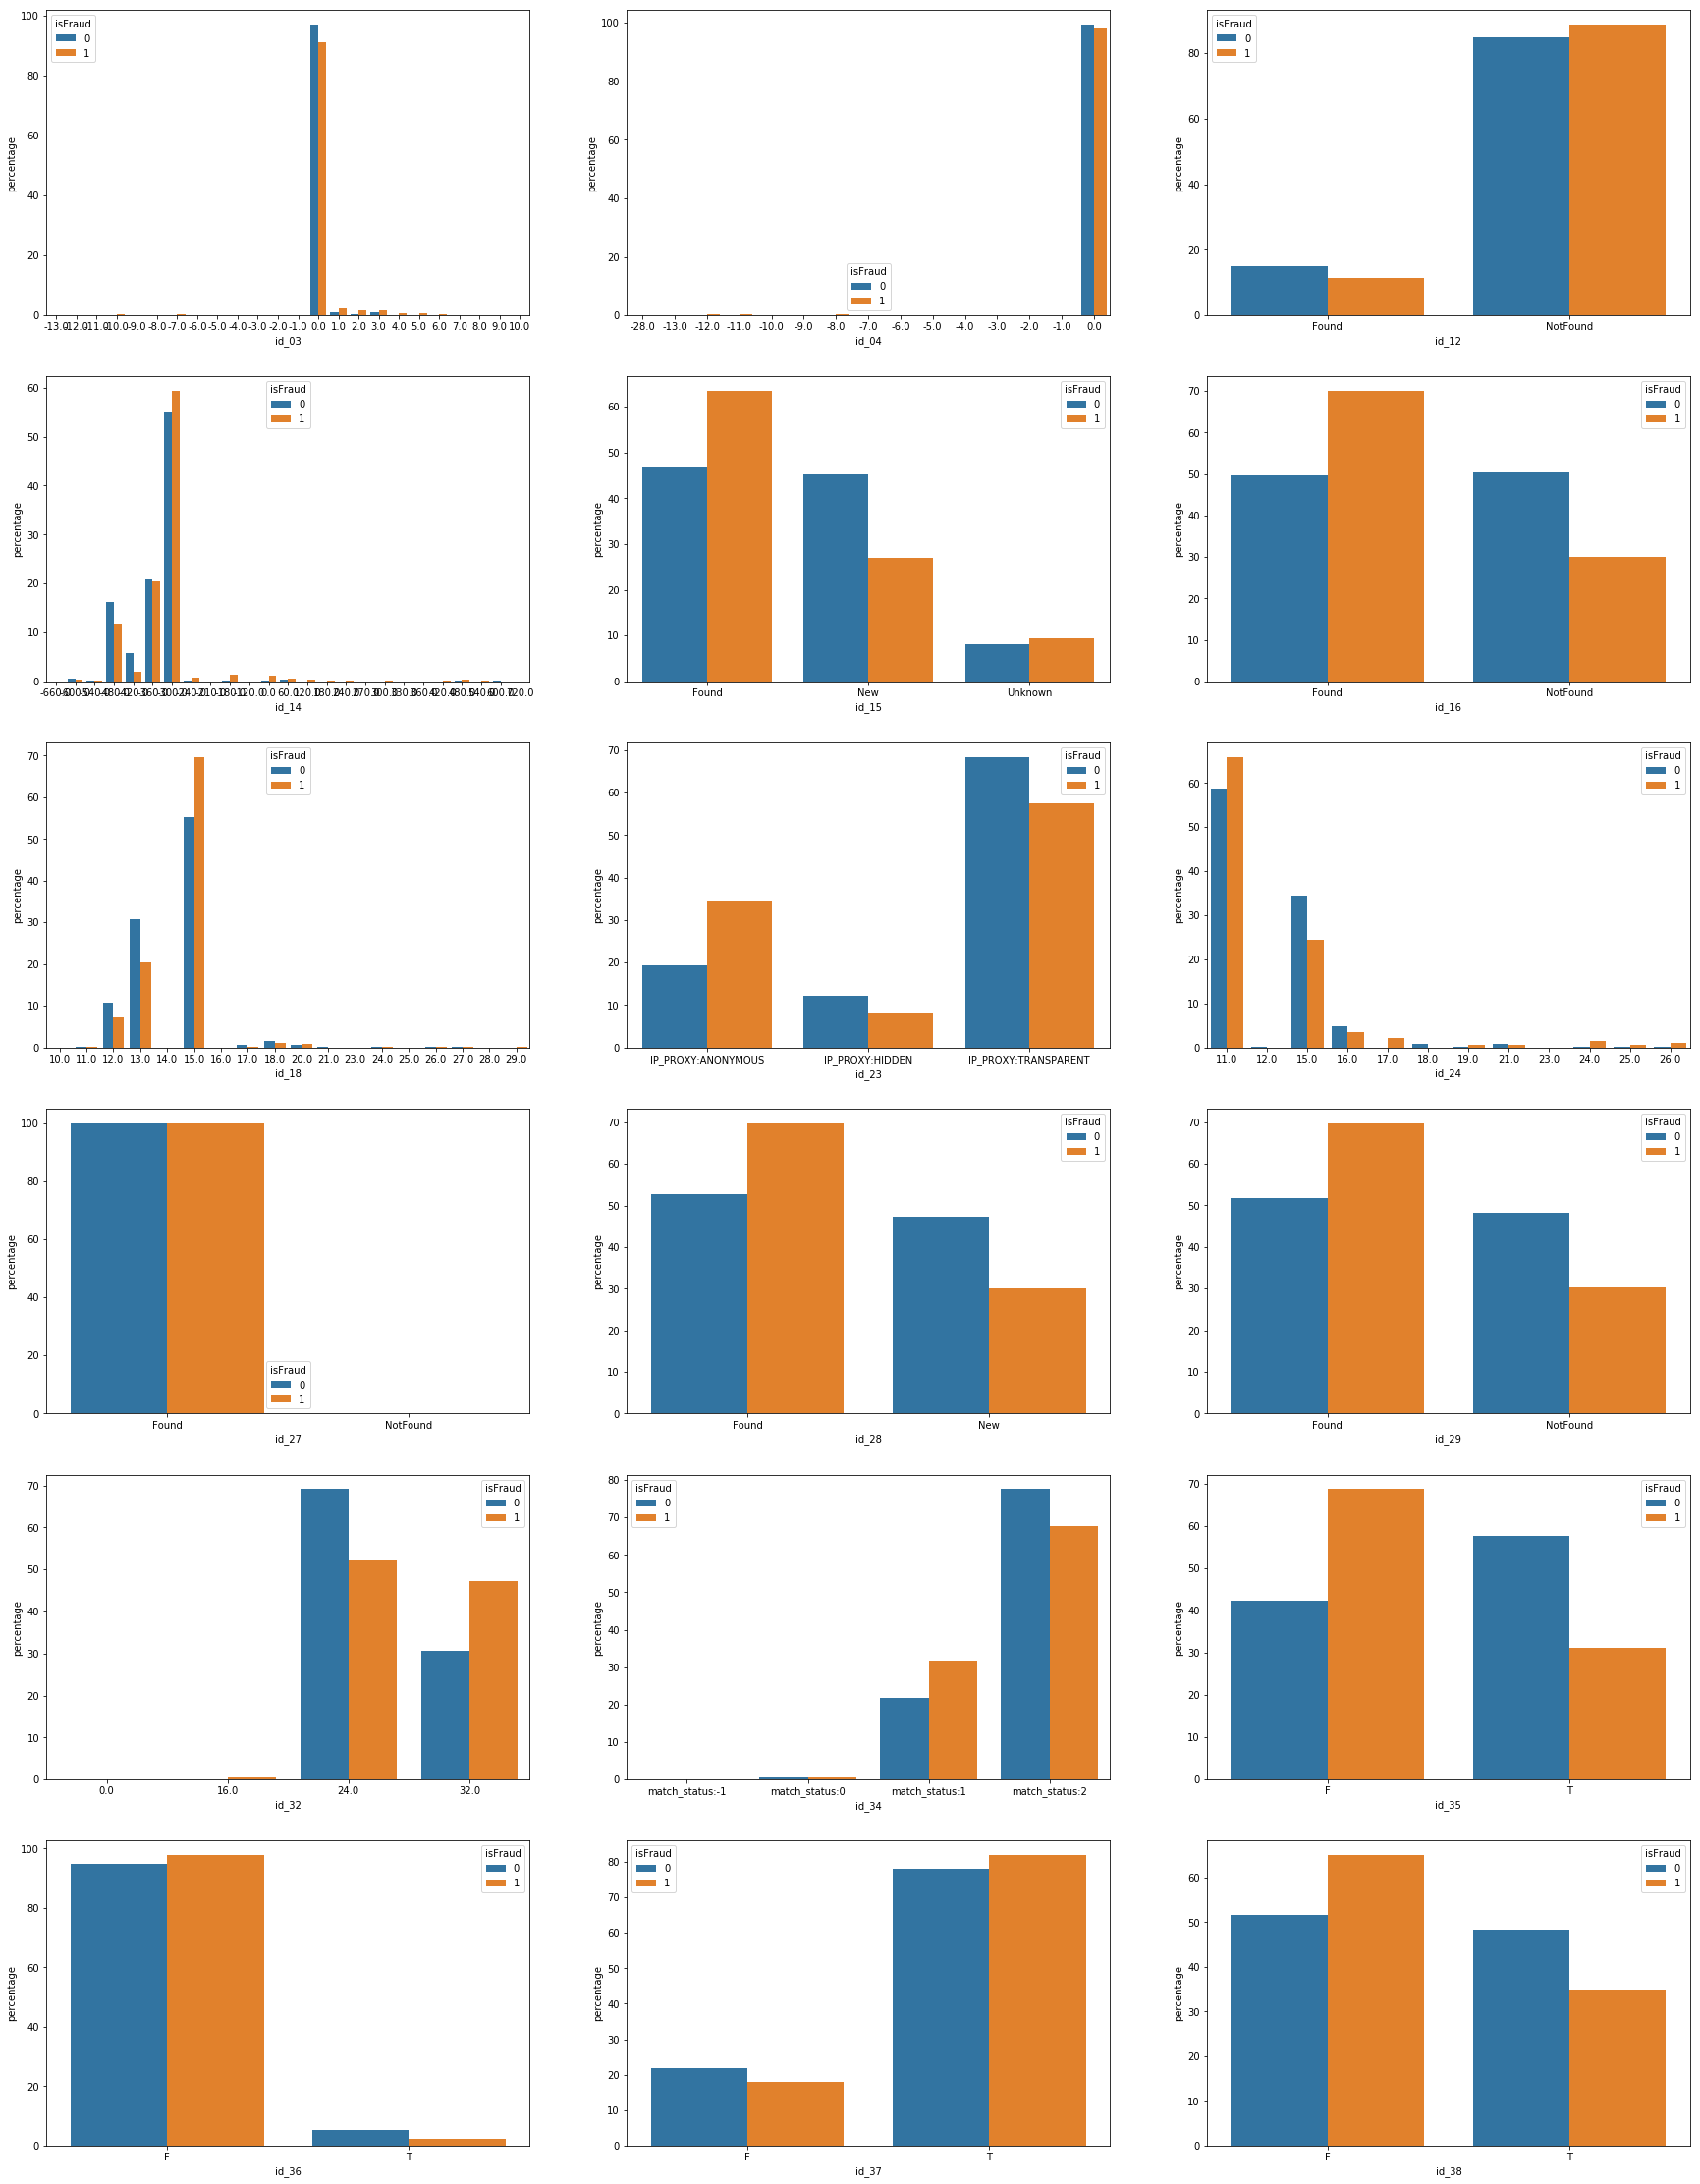

In [96]:
plt.figure(figsize=(30,40))
var = ['train_id_' + str(i) for i in range(1,19)]
col = ['id_'+str(i) for i in ['03','04',12,14,15,16,18,23,24,27,28,29,32,34,35,36,37,38]]
for i,j,k in zip(var,col,range(1,19)):
    i = (train.groupby(['isFraud'])[j]
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(j))
    plt.subplot(6,3,k)
    sns.barplot(x=j, y="percentage", hue="isFraud", data=i)
plt.show()

In [ ]:
gc.collect()

Other than the categorical variables above, let's take a closer look to the id 30, 31, 33 as well since they are object type

In [65]:
test.columns=[item.replace("-", "_") for item in test.columns]

In [66]:
train['id_30'].value_counts().head()         # Device info?

Windows 10     21154
Windows 7      13110
iOS 11.2.1      3722
iOS 11.1.2      3699
Android 7.0     2871
Name: id_30, dtype: int64

In [67]:
# https://medium.com/@gtavicecity581/ieee-fraud-detection-469398ce1ac4
train['OS_id_30'] = train['id_30'].str.split(' ', expand=True)[0]
train['version_id_30'] = train['id_30'].str.split(' ', expand=True)[1]
test['OS_id_30'] = test['id_30'].str.split(' ', expand=True)[0]
test['version_id_30'] = test['id_30'].str.split(' ', expand=True)[1]

In [68]:
train['id_31'].value_counts().head() # Browser info

chrome 63.0              21861
mobile safari 11.0       13305
mobile safari generic    11458
ie 11.0 for desktop       9016
safari generic            8180
Name: id_31, dtype: int64

In [69]:
train['browser_id_31'] = train['id_31'].str.split(' ', expand=True)[0].value_counts()
train['version_id_31'] = train['id_31'].str.split(' ', expand=True)[1].value_counts()
test['browser_id_31'] = test['id_31'].str.split(' ', expand=True)[0].value_counts()
test['version_id_31'] = test['id_31'].str.split(' ', expand=True)[1].value_counts()

In [70]:
train['id_33'].value_counts().head() # Device Resolution

1920x1080    16874
1366x768      8605
1334x750      6447
2208x1242     4900
1440x900      4384
Name: id_33, dtype: int64

In [71]:
train['resol_width_id_31'] = train['id_33'].str.split('x', expand=True)[0].value_counts()
train['resol_height_id_31'] = train['id_33'].str.split('x', expand=True)[1].value_counts()
test['resol_width_id_31'] = test['id_33'].str.split('x', expand=True)[0].value_counts()
test['resol_height_id_31'] = test['id_33'].str.split('x', expand=True)[1].value_counts()

In [72]:
train['OS_id_30'] = train['id_30'].str.split(' ', expand=True)[0]
train['version_id_30'] = train['id_30'].str.split(' ', expand=True)[1]
test['OS_id_30'] = test['id_30'].str.split(' ', expand=True)[0]
test['version_id_30'] = test['id_30'].str.split(' ', expand=True)[1]

train['browser_id_31'] = train['id_31'].str.split(' ', expand=True)[0].value_counts()
train['version_id_31'] = train['id_31'].str.split(' ', expand=True)[1].value_counts()
test['browser_id_31'] = test['id_31'].str.split(' ', expand=True)[0].value_counts()
test['version_id_31'] = test['id_31'].str.split(' ', expand=True)[1].value_counts()

train['resol_width_id_31'] = train['id_33'].str.split('x', expand=True)[0].value_counts()
train['resol_height_id_31'] = train['id_33'].str.split('x', expand=True)[1].value_counts()
test['resol_width_id_31'] = test['id_33'].str.split('x', expand=True)[0].value_counts()
test['resol_height_id_31'] = test['id_33'].str.split('x', expand=True)[1].value_counts()

### DeviceType and DeviceInfo

In [73]:
train[~train.iloc[:, 431:433].isnull().any(axis=1)].iloc[:, 431:433].head()

DeviceType                     DeviceInfo
4      mobile  SAMSUNG SM-G892A Build/NRD90M
8      mobile                     iOS Device
10    desktop                        Windows
16    desktop                          MacOS
17    desktop                        Windows

In [74]:
print(len(train['DeviceType'].value_counts()))
print(len(train['DeviceInfo'].value_counts()))

2
1782


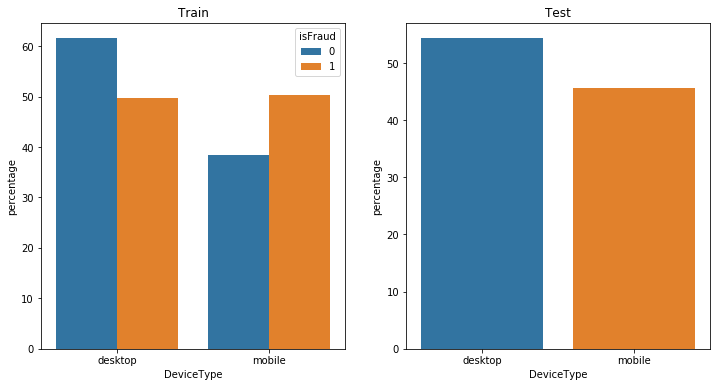

In [139]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_DeviceType = (train[~train['DeviceType'].isnull()].groupby(['isFraud'])['DeviceType'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('DeviceType'))
sns.barplot(x="DeviceType", y="percentage", hue="isFraud", data=train_DeviceType)
plt.title('Train')
plt.subplot(1,2,2)
test_DeviceType =test[~test['DeviceType'].isnull()]['DeviceType'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="index", y="percentage", data=test_DeviceType)
plt.xlabel('DeviceType')
plt.title('Test')
plt.show()

Both Desktop and mobile have the same percentage of fraud.

In [140]:
train['DeviceInfo'].value_counts().head(10)

Windows                  47526
iOS Device               19781
MacOS                    12573
Trident/7.0               7428
rv:11.0                   1899
rv:57.0                    949
SM-J700M Build/MMB29K      530
SM-G610M Build/MMB29K      452
SM-G531H Build/LMY48B      402
rv:59.0                    362
Name: DeviceInfo, dtype: int64

Let's create a new feature by grouping the similar devices

In [75]:
# Reference: https://www.kaggle.com/jolly2136/eda-fe-xgb
def transform_DeviceInfo(df):
    df['DeviceCorp'] = df['DeviceInfo']
    df.loc[df['DeviceInfo'].str.contains('HUAWEI|HONOR', case=False, na=False, regex=True), 'DeviceCorp'] = 'HUAWEI'
    df.loc[df['DeviceInfo'].str.contains('OS', na=False, regex=False), 'DeviceCorp'] = 'APPLE'
    df.loc[df['DeviceInfo'].str.contains('Idea|TA', case=False, na=False), 'DeviceCorp'] = 'Lenovo'
    df.loc[df['DeviceInfo'].str.contains('Moto|XT|Edison', case=False, na=False), 'DeviceCorp'] = 'Moto'
    df.loc[df['DeviceInfo'].str.contains('MI|Mi|Redmi', na=False), 'DeviceCorp'] = 'Mi'
    df.loc[df['DeviceInfo'].str.contains('VS|LG|EGO', na=False), 'DeviceCorp'] = 'LG'
    df.loc[df['DeviceInfo'].str.contains('ONE TOUCH|ALCATEL', case=False, na=False, regex=False), 'DeviceCorp'] = 'ALCATEL'
    df.loc[df['DeviceInfo'].str.contains('ONE A', na=False, regex=False), 'DeviceCorp'] = 'ONEPLUS'
    df.loc[df['DeviceInfo'].str.contains('OPR6', na=False, regex=False), 'DeviceCorp'] = 'HTC'
    df.loc[df['DeviceInfo'].str.contains('Nexus|Pixel', case=False, na=False, regex=True), 'DeviceCorp'] = 'google'
    df.loc[df['DeviceInfo'].str.contains('STV', na=False, regex=False), 'DeviceCorp'] = 'blackberry'
    df.loc[df['DeviceInfo'].str.contains('ASUS', case=False, na=False, regex=False), 'DeviceCorp'] = 'ASUS'
    df.loc[df['DeviceInfo'].str.contains('BLADE', case=False, na=False, regex=False), 'DeviceCorp'] = 'ZTE'
    
    df['DeviceCorp'] = df['DeviceInfo'].astype('str').str.split(':', expand=True)[0].\
                                str.split('-', expand=True)[0].str.split(expand=True)[0]
    
    df.loc[df['DeviceInfo'].isin(['rv', 'SM', 'GT', 'SGH']), 'DeviceCorp'] = 'SAMSUNG'
    df.loc[df['DeviceInfo'].str.startswith('Z', na=False), 'DeviceCorp'] = 'ZTE'
    df.loc[df['DeviceInfo'].str.startswith('KF', na=False), 'DeviceCorp'] = 'Amazon'
    
    for i in ['D', 'E', 'F', 'G']:
        df.loc[df['DeviceInfo'].str.startswith(i, na=False), 'DeviceCorp'] = 'SONY'

    df.loc[df['DeviceCorp'].isin(df['DeviceCorp'].value_counts()\
                                 [df['DeviceCorp'].value_counts() < 100].index), 'DeviceCorp'] = 'Other'
    df['DeviceCorp'] = df['DeviceCorp'].str.upper()
    
    return df

In [76]:
train = transform_DeviceInfo(train)
test = transform_DeviceInfo(test)

In [77]:
train.DeviceCorp

0                 NAN
1                 NAN
2                 NAN
3                 NAN
4             SAMSUNG
5                 NAN
6                 NAN
7                 NAN
8                 IOS
9                 NAN
10            WINDOWS
11                NAN
12                NAN
13                NAN
14                NAN
15                NAN
16              MACOS
17            WINDOWS
18                NAN
19                NAN
20                NAN
21                NAN
22                NAN
23                NAN
24                NAN
25                NAN
26                NAN
27                NAN
28                NAN
29                NAN
30                NAN
31                NAN
32                NAN
33                NAN
34                NAN
35                NAN
36                NAN
37                NAN
38                NAN
39                NAN
40            WINDOWS
41                NAN
42                NAN
43                NAN
44                NAN
45        

Change the NAN into np.nan

In [78]:
def settingNaN(value):
    if value=='NAN':
        return np.nan
    else:
        return value
    
train['DeviceCorp'] = train['DeviceCorp'].apply(settingNaN)
test['DeviceCorp'] = test['DeviceCorp'].apply(settingNaN)

In [79]:
train.DeviceCorp.head()

0        NaN
1        NaN
2        NaN
3        NaN
4    SAMSUNG
Name: DeviceCorp, dtype: object

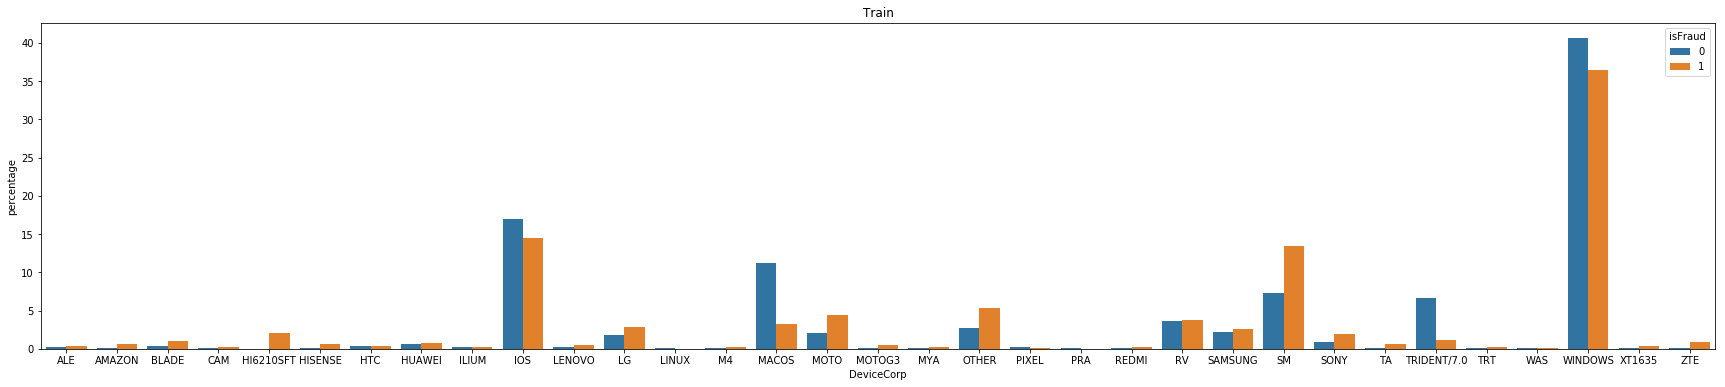

In [80]:
plt.figure(figsize=(30,6))
train_DeviceCorp = (train[~train['DeviceCorp'].isnull()].groupby(['isFraud'])['DeviceCorp'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('DeviceCorp'))
sns.barplot(x="DeviceCorp", y="percentage", hue="isFraud", data=train_DeviceCorp)
plt.title('Train')
plt.show()

# <a style="color:#6699ff"> III. Preprocessing</a>

In [81]:
import copy
# sklearn
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, SCORERS, make_scorer, fbeta_score, roc_curve, auc 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
import graphviz

In [82]:
# Reducing memory usage
# From https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# WARNING! THIS CAN DAMAGE THE DATA
def reduce_mem_usage2(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [83]:
train = reduce_mem_usage2(train)
test = reduce_mem_usage2(test) 

Memory usage of dataframe is 2025.99 MB
Memory usage after optimization is: 571.09 MB
Decreased by 71.8%
Memory usage of dataframe is 1720.26 MB
Memory usage after optimization is: 480.93 MB
Decreased by 72.0%


In [84]:
train.dtypes.head()

TransactionID        int32
isFraud               int8
TransactionDT        int32
TransactionAmt     float16
ProductCD         category
dtype: object

### Additional Feature Engineering

In [85]:
# Reference: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook#Some-feature-engineering
train['Trans_min_mean'] = train['TransactionAmt'] - train['TransactionAmt'].mean()
train['Trans_min_std'] = train['Trans_min_mean'] / train['TransactionAmt'].std()
test['Trans_min_mean'] = test['TransactionAmt'] - test['TransactionAmt'].mean()
test['Trans_min_std'] = test['Trans_min_mean'] / test['TransactionAmt'].std()
train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / \
    train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card4'] = train['TransactionAmt'] / \
    train.groupby(['card4'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_std_card1'] = train['TransactionAmt'] / \
    train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_std_card4'] = train['TransactionAmt'] / \
    train.groupby(['card4'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_mean_card1'] = test['TransactionAmt'] / \
    test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_mean_card4'] = test['TransactionAmt'] / \
    test.groupby(['card4'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_std_card1'] = test['TransactionAmt'] / \
    test.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_std_card4'] = test['TransactionAmt'] / \
    test.groupby(['card4'])['TransactionAmt'].transform('std')

### Label Encoding

In [86]:
cat_cols = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
            'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29','id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36',
            'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'hour_warning', 'new_card3', 'DeviceCorp', 'OS_id_30',
            'version_id_30', 'browser_id_31', 'version_id_31', 'resol_width_id_31', 'resol_height_id_31']
for col in cat_cols:
    if col in train.columns:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))   

### PCA
Compress V features through PCA

In [87]:
test['isFraud'] = 'test'
df = pd.concat(([train, test]), axis=0)
df = df.reset_index()
df = df.drop('index', axis=1)

In [88]:
df.head()

C1  C10  C11  C12   C13  C14   C2   C3   C4   C5   C6   C7   C8   C9  \
0  1.0  0.0  2.0  0.0   1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1  1.0  0.0  1.0  0.0   1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  1.0  0.0  1.0  0.0   1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  2.0  0.0  1.0  0.0  25.0  1.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4  1.0  1.0  1.0  0.0   1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

      D1   D10    D11  D12  D13  D14    D15     D2    D3    D4   D5  D6  D7  \
0   14.0  13.0   13.0  NaN  NaN  NaN    0.0    NaN  13.0   NaN  NaN NaN NaN   
1    0.0   0.0    NaN  NaN  NaN  NaN    0.0    NaN   NaN   0.0  NaN NaN NaN   
2    0.0   0.0  315.0  NaN  NaN  NaN  315.0    NaN   NaN   0.0  NaN NaN NaN   
3  112.0  84.0    NaN  NaN  NaN  NaN  111.0  112.0   0.0  94.0  0.0 NaN NaN   
4    0.0   NaN    NaN  NaN  NaN  NaN    NaN    NaN   NaN   NaN  NaN NaN NaN   

   D8  D9  DeviceCorp  DeviceInfo  DeviceType  LogTransactionAmt  M1  M2  M3  \
0 NaN NaN          44        2740           2           4.226562   1   1   1   
1 NaN NaN          44        2740           2           3.367188   2   2   2   
2 NaN NaN          44        2740           2           4.078125   1   1   1   
3 NaN NaN          44        2740           2           3.912109   2   2   2   
4 NaN NaN          33        1565           1           3.912109   2   2   2   

   M4  M5  M6  M7  M8  M9  OS_id_30  P_emaildomain  ProductCD  R_emaildomain  \
0   2   0   1   2   2   2         6              2          4              2   
1   0   1   1   2   2   2         6              0          4              2   
2   0   0   0   0   0   0         6              1          4              2   
3   0   1   0   2   2   2         6              4          4              2   
4   3   2   2   2   2   2         0              0          1              2   

   Trans_min_mean  Trans_min_std  TransactionAmt  \
0             NaN            NaN            68.5   
1             NaN            NaN            29.0   
2             NaN            NaN            59.0   
3             NaN            NaN            50.0   
4             NaN            NaN            50.0   

   TransactionAmt_to_mean_card1  TransactionAmt_to_mean_card4  \
0                      0.194580                      0.257812   
1                      0.123779                      0.219238   
2                      0.608398                      0.442871   
3                      0.405029                      0.378174   
4                      0.515625                      0.378174   

   TransactionAmt_to_std_card1  TransactionAmt_to_std_card4  TransactionDT  \
0                     0.000000                     0.000000          86400   
1                     0.000000                     0.124939          86401   
2                     0.589355                     0.258301          86469   
3                     0.259521                     0.215454          86499   
4                     0.882812                     0.215454          86506   

   TransactionID   V1  V10  V100  V101  V102  V103  V104  V105  V106  V108  \
0        2987000  1.0  0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   
1        2987001  NaN  NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
2        2987002  1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
3        2987003  NaN  NaN   4.0   1.0  38.0  24.0   0.0   0.0   0.0   1.0   
4        2987004  NaN  NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

   V109  V11  V110  V111  V112  V113  V114  V115  V116  V117  V118  V119  V12  \
0   1.0  0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  1.0   
1   1.0  NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  0.0   
2   1.0  0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  1.0   
3   1.0  NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  1.0   
4   1.0  NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

In [89]:
from sklearn.decomposition import PCA

In [90]:
# https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook#Concating-dfs-to-get-PCA-of-V-features
def PCA_change(df, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)

    principalComponents = pca.fit_transform(df[cols])

    principalDf = pd.DataFrame(principalComponents)

    df.drop(cols, axis=1, inplace=True)

    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)

    df = pd.concat([df, principalDf], axis=1)
    
    return df

In [92]:
mas_v = train.columns[55:393]

In [93]:
for col in mas_v:
    df[col] = df[col].fillna((df[col].min() - 2))
    df[col] = (minmax_scale(df[col], feature_range=(0,1)))

In [94]:
pca = PCA(n_components=338, random_state=4)
pca.fit(df[mas_v])

PCA(copy=True, iterated_power='auto', n_components=338, random_state=4,
    svd_solver='auto', tol=0.0, whiten=False)

In [95]:
pca.explained_variance_ratio_

array([4.95869394e-01, 2.32750074e-01, 9.69233494e-02, 4.66913084e-02,
       2.20454012e-02, 1.67535292e-02, 1.55684342e-02, 1.08466320e-02,
       7.78289374e-03, 7.08189178e-03, 6.47893161e-03, 3.31744757e-03,
       2.87576670e-03, 2.28376881e-03, 1.78020405e-03, 1.62084205e-03,
       1.57507647e-03, 1.42091652e-03, 1.38485357e-03, 1.16472042e-03,
       1.08169864e-03, 1.06204669e-03, 9.55240195e-04, 8.69777279e-04,
       8.06819056e-04, 7.72695248e-04, 7.11139769e-04, 6.72719080e-04,
       6.19897145e-04, 6.10915195e-04, 5.67508243e-04, 5.26998295e-04,
       5.07220801e-04, 4.88119595e-04, 4.61676498e-04, 4.57887655e-04,
       4.34513131e-04, 4.23217426e-04, 3.86677667e-04, 3.66910123e-04,
       3.51909251e-04, 3.36273790e-04, 3.30413688e-04, 3.10233910e-04,
       2.98650034e-04, 2.79485121e-04, 2.74095416e-04, 2.62289704e-04,
       2.56751198e-04, 2.40599875e-04, 2.33056547e-04, 2.28619917e-04,
       2.12007646e-04, 2.07746955e-04, 1.91184278e-04, 1.86198774e-04,
      

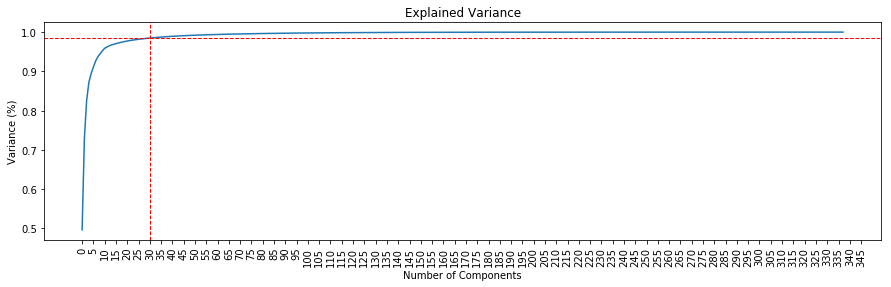

In [96]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(15,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=30, c="r", ls="--", lw=1)
plt.axhline(y=0.986, c="r", ls="--", lw=1)
plt.xticks(np.arange(0, 350, 5), rotation=90)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

30 of components can explain around 98.6% of variance. Let's set the n_components as 30.

In [97]:
df = PCA_change(df, mas_v, prefix='PCA_V_', n_components=30)

In [98]:
df = reduce_mem_usage2(df)

Memory usage of dataframe is 623.08 MB
Memory usage after optimization is: 282.27 MB
Decreased by 54.7%


In [110]:
train, test = df[df['isFraud'] != 'test'], df[df['isFraud'] == 'test'].drop('isFraud', axis=1)

### Setting X and y

In [111]:
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT','TransactionID'], axis=1)
y = train.sort_values('TransactionDT')['isFraud'].astype(bool)

test = test.sort_values('TransactionDT').drop(['TransactionDT','TransactionID'], axis=1)

In [ ]:
# X.head()

In [ ]:
# test.head()

In [112]:
print('train shape: %d, %d' %(train.shape[0],train.shape[1]))
print('test shape: %d, %d' %(test.shape[0],test.shape[1]))
print('X shape: %d, %d' %(X.shape[0],X.shape[1]))
print('y shape: %d, 1' %(y.shape[0]))

train shape: 589527, 143
test shape: 506691, 140
X shape: 589527, 140
y shape: 589527, 1


### Imputing Missing Value

In [113]:
X_ = X.copy()
test_ = test.copy()

In [114]:
def fillna(df):
    df.fillna(-999, inplace = True)
    
fillna(X)
fillna(test)

In [136]:
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
#X = clean_inf_nan(X)
test = clean_inf_nan(test)

In [116]:
# output csv..
train.to_csv('train_for_modeling.csv', index=False)
test.to_csv('test_for_modeling.csv', index=False)

### Train-test Split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45, stratify=y)

In [118]:
fillna(X_train)
fillna(X_test)

In [119]:
del train, X, y

# <a style="color:#6699ff"> IV. Machine Learning Models</a>

## Decision-Tree
We build decision tree models here as both a benchmark of the following models and a simplest model with a relatively strong interpretability.

In [120]:
# Base model with default hyperparameters
base_tree = DecisionTreeClassifier(class_weight='balanced', random_state = 42)
base_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [121]:
print('Parameters currently in use:\n')
pprint(base_tree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [122]:
print('The number of leaves of the base tree: {:d}'.format(base_tree.get_n_leaves()))
print('The depth of the base tree: {:d}'.format(base_tree.get_depth()))

The number of leaves of the base tree: 11385
The depth of the base tree: 76


In [123]:
base_tree_train_predict = base_tree.predict_proba(X_train)
base_tree_test_predict = base_tree.predict_proba(X_test)
print('base tree train auc:', roc_auc_score(y_train, base_tree_train_predict[:,1]))
print('base tree test auc:', roc_auc_score(y_test, base_tree_test_predict[:,1]))

base tree train auc: 1.0
base tree test auc: 0.759220860231311


We got a purely overfitting tree model. Let's tune it using randomized grid search first.

In [124]:
# Fonction pour mesurer la qualité d'un split
criterion = ['gini', 'entropy']
# Stratégie utilisée pour choisir la division à chaque nœud
splitter = ['best', 'random']
# Nombre maximum de niveaux dans l'arborescence
max_depth = [int(x) for x in np.linspace(10, 210, num = 11)]
max_depth.append(None)
# Nombre minimal d'échantillons requis pour diviser un nœud
min_samples_split = [2, 5, 10, 15, 30, 50, 100]
# Nombre minimal d'échantillons requis à chaque nœud
min_samples_leaf = [1, 2, 4, 10, 20]
# Le nombre de fonctionnalités à considérer lors de la recherche de la meilleure répartition
max_features = ['auto', 'log2', None]
# Nombre maximal de feuilles
max_leaf_nodes = [int(x) for x in np.linspace(10, 210, num = 11)]
[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000 , 12000, 15000, None] 
#Seuil de fractionnement d'une diminution de l'impureté
min_impurity_decrease = [0, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005, 0.01, 0.02]
# Paramètre de complexité utilisé pour l'élagage à coût minimal et complexité
ccp_alpha = [x for x in np.linspace(0, 0.05, num = 11)]
# Créer la grille aléatoire
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'max_leaf_nodes': max_leaf_nodes,
               'min_impurity_decrease': min_impurity_decrease,
               'ccp_alpha': ccp_alpha}

pprint(random_grid)

{'ccp_alpha': [0.0,
               0.005,
               0.01,
               0.015,
               0.02,
               0.025,
               0.03,
               0.035,
               0.04,
               0.045,
               0.05],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, None],
 'max_features': ['auto', 'log2', None],
 'max_leaf_nodes': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210],
 'min_impurity_decrease': [0,
                           5e-05,
                           0.0001,
                           0.0002,
                           0.0005,
                           0.001,
                           0.0015,
                           0.002,
                           0.005,
                           0.01,
                           0.02],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 15, 30, 50, 100],
 'splitter': ['best', 'random']}


In [125]:
# Utilisez la grille aléatoire pour rechercher les meilleurs hyperparamètres
# Recherche aléatoire de paramètres avec un score auc_roc, utilisant une validation croisée stratifiée 3 fois
skf = StratifiedKFold(n_splits=3, random_state=42)
tree_random = RandomizedSearchCV(estimator = base_tree, param_distributions = random_grid, n_iter = 60, cv = skf, scoring = 'roc_auc', verbose=0, random_state=42, n_jobs = -1)
tree_random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf...
                                        'max_leaf_nodes': [10, 30, 50, 70,

In [126]:
best_random_tree_train_predict = tree_random.predict_proba(X_train)
best_random_tree_test_predict = tree_random.predict_proba(X_test)
print('best random tree train auc:', roc_auc_score(y_train, best_random_tree_train_predict[:,1]))
print('best random tree test auc:', roc_auc_score(y_test, best_random_tree_test_predict[:,1]))

best random tree train auc: 0.8192404509652583
best random tree test auc: 0.8179840132903997


Tuned decision tree performs well, least overfitting. No need to do grid search further.

In [127]:
print('Tuned best random Hyperparameters:\n')
pprint(tree_random.best_estimator_.get_params())

Tuned best random Hyperparameters:

{'ccp_alpha': 0.005,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 170,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_impurity_decrease': 0.0005,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [128]:
tree_random.best_estimator_.cost_complexity_pruning_path(X_train, y_train)

{'ccp_alphas': array([0.        , 0.00186745, 0.00191446, 0.00195138, 0.00229596,
        0.00230245, 0.00242485, 0.00243824, 0.00244659, 0.00266548,
        0.00280115, 0.00316197, 0.00349712, 0.00369517, 0.00375561,
        0.00384169, 0.00450224, 0.00482244, 0.00593574, 0.00658828,
        0.00826255, 0.01878023, 0.03074861, 0.04138827, 0.06335782,
        0.08928084]),
 'impurities': array([0.67162288, 0.67349033, 0.6754048 , 0.67735618, 0.67965214,
        0.68195459, 0.68437944, 0.68681767, 0.68926426, 0.6972607 ,
        0.70006185, 0.70322382, 0.71021806, 0.71391323, 0.71766884,
        0.72151053, 0.72601278, 0.73565766, 0.7415934 , 0.74818168,
        0.75644423, 0.77522446, 0.80597306, 0.84736133, 0.91071916,
        1.        ])}

In [129]:
print('The number of leaves of the best random tree: {:d}'.format(tree_random.best_estimator_.get_n_leaves()))
print('The depth of the best random tree: {:d}'.format(tree_random.best_estimator_.get_depth()))

The number of leaves of the best random tree: 9
The depth of the best random tree: 4


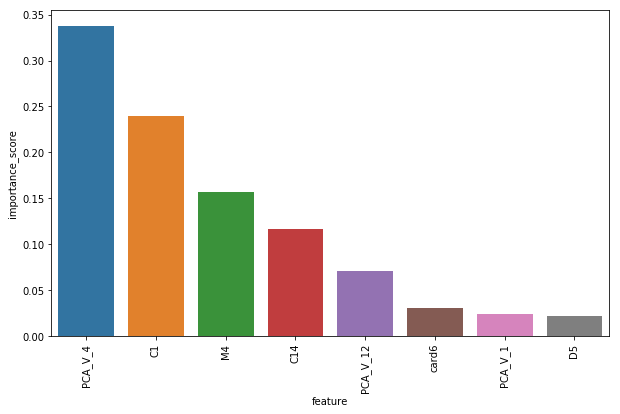

In [131]:
# visualiser les caractéristiques avec un score important(> 0)
best_random_tree = tree_random.best_estimator_
plt.figure(figsize=(10,6))
sorted_importance_tree = sorted(zip(X_train.columns, best_random_tree.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance_useful_tree = [ i for i in sorted_importance_tree if i[1] > 0]
a, b = zip(*sorted_importance_useful_tree)
fp = pd.DataFrame({'feature':a, 'importance_score':b})[:15]
sns.barplot(x="feature", y="importance_score", data=fp)
plt.xticks(rotation=90)
plt.show()

In [ ]:
## test prediction avec tree decision

In [142]:
test.dtypes

C1                              float16
C10                             float16
C11                             float16
C12                             float16
C13                             float16
C14                             float16
C2                              float16
C3                              float16
C4                              float16
C5                              float16
C6                              float16
C7                              float16
C8                              float16
C9                              float16
D1                              float16
D10                             float16
D11                             float16
D12                             float16
D13                             float16
D14                             float16
D15                             float16
D2                              float16
D3                              float16
D4                              float16
D5                              float16


In [ ]:
fillna(test)

In [144]:
best_random_tree_reeltest_predict = tree_random.predict_proba(test)

In [146]:
submission_Tree=pd.read_csv('sample_submission.csv',index_col='TransactionID')
submission_Tree['isFraud']=best_random_tree_reeltest_predict[:,1]
submission_Tree['isFraud'].unique()

array([0.08704879, 0.34869337, 0.23069043, 0.5789095 , 0.46158655,
       0.83271973, 0.94294383, 0.70629538, 0.1996152 ])

In [147]:
submission_Tree.to_csv('submission_Tree.csv',index='TransactionID')

In [148]:
sub=pd.read_csv('submission_Tree.csv')
sub.head()

TransactionID   isFraud
0        3663549  0.087049
1        3663550  0.348693
2        3663551  0.348693
3        3663552  0.087049
4        3663553  0.230690

## Random Forest

In [149]:
base_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
base_rf.fit(X_train, y_train)
base_rf_train_predict = base_rf.predict_proba(X_train)
base_rf_test_predict = base_rf.predict_proba(X_test)
print('base random forest train auc:', roc_auc_score(y_train, base_rf_train_predict[:,1]))
print('base random forest test auc:', roc_auc_score(y_test, base_rf_test_predict[:,1]))

base random forest train auc: 0.9999999999999999
base random forest test auc: 0.9328461301250781


In [150]:
print('Parameters currently in use:\n')
pprint(base_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [151]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 15)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 30, 50, 100]
min_samples_leaf = [1, 2, 4, 10, 20]
max_features = ['auto', 'log2', None]
max_leaf_nodes = [int(x) for x in np.linspace(10, 210, num = 11)]
[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000 , 12000, 15000, None]
min_impurity_decrease = [0, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005, 0.01, 0.02]
ccp_alpha = [x for x in np.linspace(0, 0.05, num = 11)]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'max_leaf_nodes': max_leaf_nodes,
               'min_impurity_decrease': min_impurity_decrease,
               'ccp_alpha': ccp_alpha,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'ccp_alpha': [0.0,
               0.005,
               0.01,
               0.015,
               0.02,
               0.025,
               0.03,
               0.035,
               0.04,
               0.045,
               0.05],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'log2', None],
 'max_leaf_nodes': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210],
 'min_impurity_decrease': [0,
                           5e-05,
                           0.0001,
                           0.0002,
                           0.0005,
                           0.001,
                           0.0015,
                           0.002,
                           0.005,
                           0.01,
                           0.02],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 15, 30, 50, 100],
 'n_estimators': [10,
                  80,
            

In [154]:
%%time
skf = StratifiedKFold(n_splits=3, random_state=42)
rf_random = RandomizedSearchCV(estimator = base_rf, param_distributions = random_grid, n_iter = 2, 
                               cv = skf, scoring = 'roc_auc', verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Wall time: 5h 29min 46s


In [ ]:
gc.collect()

In [ ]:
best_random_rf_train_predict = rf_random.predict_proba(X_train)
best_random_rf_test_predict = rf_random.predict_proba(X_test)
print('best random forest train auc from randomized search:', roc_auc_score(y_train, best_random_rf_train_predict[:,1]))
print('best random tree test auc from randomized search:', roc_auc_score(y_test, best_random_rf_test_predict[:,1]))

In [ ]:
print('Tuned best random rf Hyperparameters:\n')
pprint(rf_random.best_estimator_.get_params())

In [ ]:
best_random_tree = tree_random.best_estimator_
plt.figure(figsize=(10,6))
sorted_importance_rf = sorted(zip(X_train.columns, best_random_tree.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance_useful_rf = [ i for i in sorted_importance_rf if i[1] > 0]
a, b = zip(*sorted_importance_useful_rf)
fp = pd.DataFrame({'feature':a, 'importance_score':b})[:15]
sns.barplot(x="feature", y="importance_score", data=fp, palette = 'pastel')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sorted_importance_useful_rf

test prediction Randomn forest

In [ ]:
best_random_rf_reeltest_predict = rf_random.predict_proba(test)

In [ ]:
submission_rf=pd.read_csv('sample_submission.csv',index_col='TransactionID')
submission_rf['isFraud']=best_random_rf_reeltest_predict[:,1]
submission_rf['isFraud'].unique()

In [ ]:
submission_Tree.to_csv('submission_Tree.csv',index='TransactionID')

In [ ]:
sub1=pd.read_csv('submission_Tree.csv')
sub1.head()

## LightGBM

base case - metric: roc auc score

In [155]:
base_lgbm = LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
base_lgbm.fit(X_train, y_train)
base_lgbm_train_predict = base_lgbm.predict_proba(X_train)
base_lgbm_test_predict = base_lgbm.predict_proba(X_test)
print('base lgbm train auc:', roc_auc_score(y_train, base_lgbm_train_predict[:,1]))
print('base lgbm test auc:', roc_auc_score(y_test, base_lgbm_test_predict[:,1]))

base lgbm train auc: 0.9464403291231731
base lgbm test auc: 0.9252126056434662


In [158]:
# default hyperparameters with missing values not imputed, class_weight = 'balanced'
base_lgbm_not_imputed = LGBMClassifier(class_weight='balanced')
base_lgbm_not_imputed.fit(X_train, y_train)
predict_y_ = base_lgbm_not_imputed.predict_proba(X_train)
predict_y  = base_lgbm_not_imputed.predict_proba(X_test)
print('base_lgbm_not_imputed train auc:', roc_auc_score(y_train, predict_y_[:,1]))
print('base_lgbm_not_imputed test auc:', roc_auc_score(y_test, predict_y[:,1]))

base_lgbm_not_imputed train auc: 0.9461237715639917
base_lgbm_not_imputed test auc: 0.9261916607333394


In [159]:
print('Parameters currently in use:\n')
pprint(base_lgbm.get_params())

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


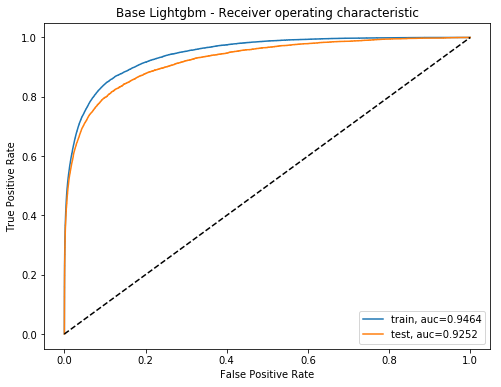

In [161]:
plt.figure(figsize=(8,6))
# auc of train
fpr, tpr, thresh = roc_curve(y_train, base_lgbm_train_predict[:,1])
auc = roc_auc_score(y_train, base_lgbm_train_predict[:,1])
plt.plot(fpr,tpr,label="train, auc="+str(round(auc,4)))
# auc of test
fpr, tpr, thresh = roc_curve(y_test, base_lgbm_test_predict[:,1])
auc = roc_auc_score(y_test, base_lgbm_test_predict[:,1])
plt.plot(fpr,tpr,label="test, auc="+str(round(auc,4)))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Base Lightgbm - Receiver operating characteristic')
plt.show()

In [ ]:
# output to csv, submit to leaderboard for the first time
y_preds = lgbm_default.predict_proba(test)[:,1] 
sample_submission['isFraud'] = y_preds
sample_submission.to_csv('lgbm_default_model.csv',index=False)

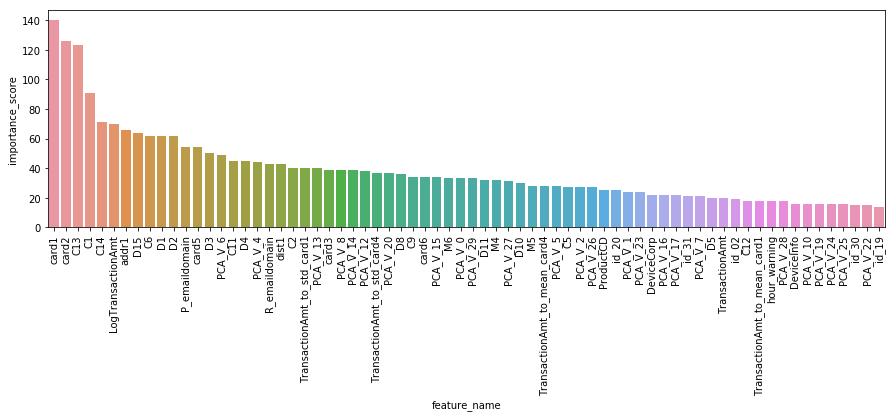

In [172]:
# feature importantce
plt.figure(figsize=(15,4))
best_random_lgbm_sorted_importance = sorted(zip(X_train.columns, best_random_lgbm.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*best_random_lgbm_sorted_importance)
fp = pd.DataFrame({'feature_name':a, 'importance_score':b})[:70]
sns.barplot(x="feature_name", y="importance_score", data=fp)
plt.xticks(rotation=90)
plt.show()

In [207]:
#best_random_lgbm_sorted_importance

In [174]:
low_importance = []
for i in best_random_lgbm_sorted_importance:
    if i[1] <= 2:
        low_importance.append(i[0])
low_importance

['D12',
 'D14',
 'D9',
 'DeviceType',
 'M2',
 'M7',
 'M8',
 'id_01',
 'id_11',
 'id_26',
 'id_34',
 'D7',
 'M1',
 'Trans_min_mean',
 'Trans_min_std',
 'addr2',
 'browser_id_31',
 'id_04',
 'id_08',
 'id_10',
 'id_15',
 'id_16',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_27',
 'id_28',
 'id_29',
 'id_35',
 'id_36',
 'id_37',
 'new_card3',
 'resol_height_id_31',
 'resol_width_id_31',
 'version_id_31']

Doing feature selection by removing low importantce features

In [208]:
# The Second Submission
y_preds_ = best_random_lgbm.predict_proba(test)[:,1]
sample_submission['isFraud'] = y_preds_
sample_submission.to_csv('lgbm_random_grid.csv',index=False)

In [176]:
best_random_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

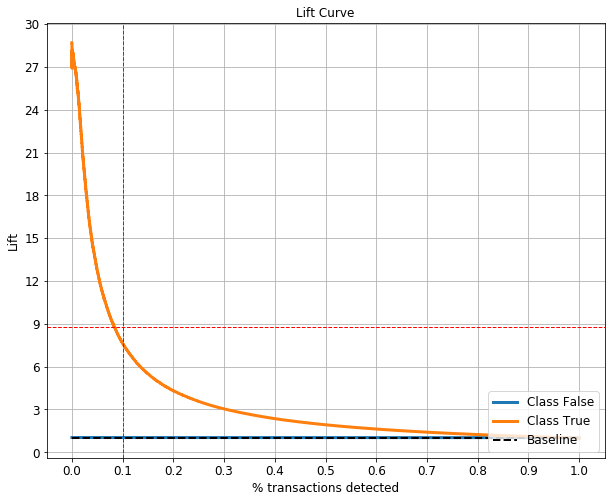

In [188]:
# Import the scikitplot module
import scikitplot as skplt

# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test, best_lgbm_test_predict, figsize=(10,8),text_fontsize='large')
plt.xlabel('% transactions detected')
plt.axvline(x=0.1, c="r", ls="--", lw=1)
plt.axhline(y=8.8, c="r", ls="--", lw=1)
plt.yticks(np.arange(0, 31, 3))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

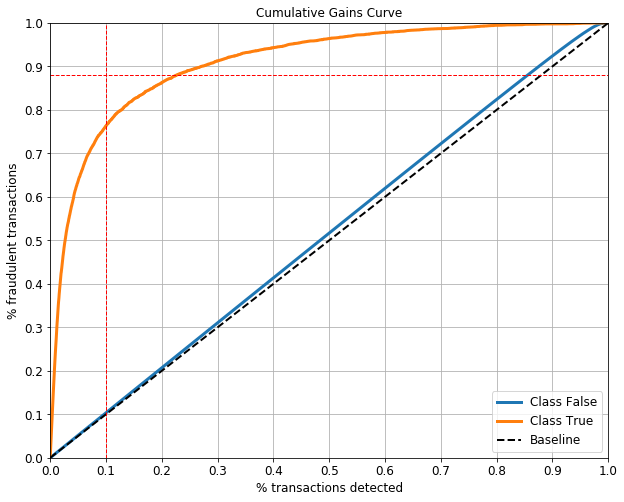

In [189]:
# Plot the cumulative gains curve
skplt.metrics.plot_cumulative_gain(y_test, best_lgbm_test_predict, figsize=(10,8),text_fontsize='large')
plt.axvline(x=0.1, c="r", ls="--", lw=1)
plt.axhline(y=0.88, c="r", ls="--", lw=1)
plt.xlabel('% transactions detected')
plt.ylabel('% fraudulent transactions')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

In [200]:
from sklearn.metrics import precision_recall_curve

In [201]:
# best_random_lgbm
p, r, thresholds = precision_recall_curve(y_test, best_lgbm_test_predict[:,1])


In [203]:
from sklearn.metrics import plot_precision_recall_curve

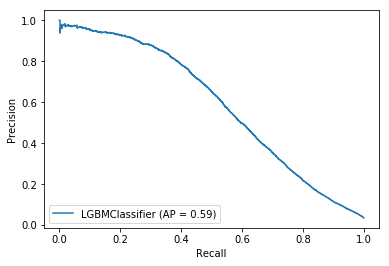

In [204]:
disp = plot_precision_recall_curve(best_random_lgbm, X_test, y_test)
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

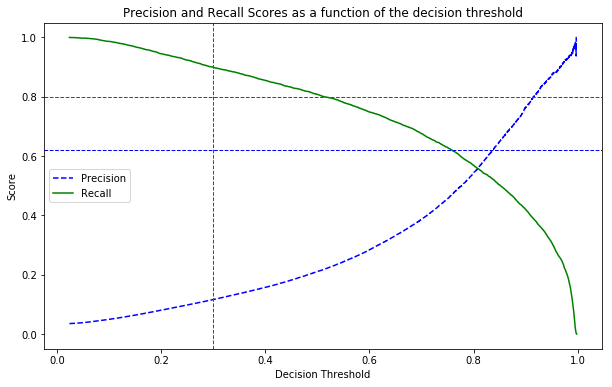

In [205]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(10, 6))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(p, r, thresholds)
plt.axvline(x=0.30, c="r", ls="--", lw=1)
plt.axhline(y=0.80, c="g", ls="--", lw=1)
plt.axhline(y=0.62, c="b", ls="--", lw=1)

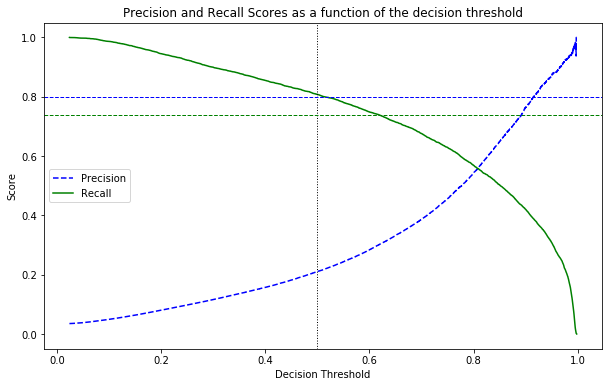

In [206]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(10, 6))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(p, r, thresholds)
plt.axvline(x=0.50, c="black", ls=':', lw=1)
plt.axhline(y=0.80, c="b", ls="--", lw=1)
plt.axhline(y=0.74, c="g", ls="--", lw=1)

In [ ]:
169483 / (169483+1212)

In [198]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[152027  18668]
 [  1183   4981]]
Normalized confusion matrix
[[0.89063534 0.10936466]
 [0.19192083 0.80807917]]


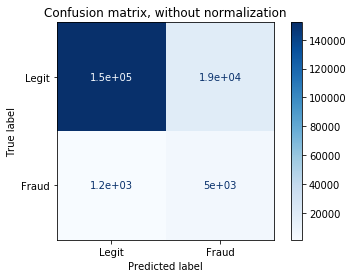

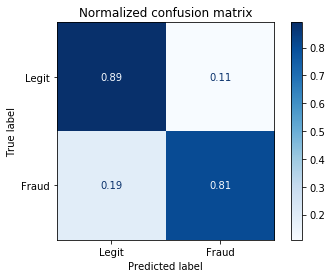

In [199]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    plt.figure(figsize=(10, 6))
    disp = plot_confusion_matrix(best_random_lgbm, X_test, y_test,
                                 display_labels=['Legit','Fraud'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)

plt.show()